# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

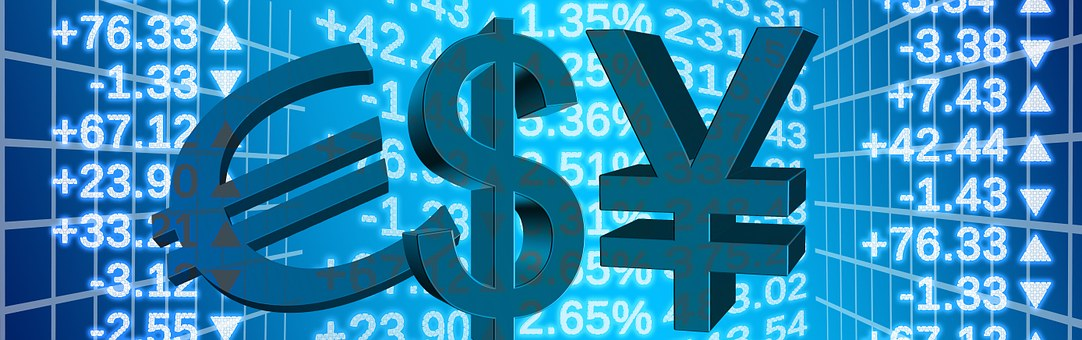

In [1]:
from IPython.display import Image
Image(filename='img/imagenStock.jpg' ,  width= 1280)

# Trabajo Práctico N°1: Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo. 

### Carga del dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams['figure.figsize'] = (15, 5)
import sys
import missingno as msno

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
df_ = pd.read_csv("inputs/dataset.csv", index_col=0, parse_dates=True, dayfirst=True)
# los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

In [4]:
df_.head()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
1997-07-02,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.41992,NaN,1199.06,4333.899902,0.9998,1.0767,1.6670,1.1223,114.52,7.7472,8.3210,NaN
1997-07-03,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.41016,15055.70020,1150.62,4323.459961,0.9994,1.0778,1.6885,1.1242,113.46,7.7445,8.3214,NaN
1997-07-04,837.950012,13494.0,NaN,NaN,4812.799805,3946.729980,2934.500000,19968.00000,14823.00000,1159.34,4323.819824,0.9995,NaN,NaN,1.1230,NaN,NaN,NaN,NaN
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.16992,14858.59961,1096.82,4291.450195,0.9998,1.0779,1.6870,1.1226,112.60,7.7428,8.3218,NaN
1997-07-08,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.89063,14792.20020,1109.67,4306.390137,0.9999,1.0790,1.6885,1.1180,112.76,7.7436,8.3219,NaN


In [5]:
df_.tail(10)

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
2020-04-29,33185.05078,83171.0,2939.510010,8982.759766,6115.299805,11107.74023,4671.109863,NaN,24643.58984,2822.44,32720.16016,66.6800,5.3923,1.2429,1.0875,106.67,7.7503,7.0755,111.0
2020-04-30,32742.83984,80506.0,2912.429932,9000.509766,5901.200195,10861.63965,4572.180176,20193.68945,NaN,2860.08,33717.62109,66.7800,5.4296,1.2602,1.0957,106.94,7.7514,7.0622,108.0
2020-05-01,NaN,NaN,2830.709961,8718.179688,5763.100098,NaN,NaN,19619.34961,NaN,NaN,NaN,66.6200,5.4858,1.2509,1.0985,106.76,7.7517,7.0622,108.0
2020-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0
2020-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0
2020-05-04,32387.27930,78876.0,2842.739990,8834.110352,5753.799805,10466.79981,4378.229980,NaN,23613.80078,NaN,31715.34961,66.8835,5.5714,1.2430,1.0908,106.82,7.7532,7.0622,110.0
2020-05-05,33546.51953,79471.0,2868.439941,8930.620117,5849.399902,10729.45996,4483.129883,NaN,23868.66016,NaN,31453.50977,66.9515,5.5623,1.2449,1.0840,106.52,7.7534,7.0622,110.0
2020-05-06,34158.89063,79064.0,2848.419922,8984.860352,5853.799805,10606.20020,4433.379883,NaN,24137.48047,2878.14,31685.75000,67.0475,5.6798,1.2347,1.0795,106.07,7.7520,7.1031,112.0
2020-05-07,35850.21094,78119.0,2881.189941,9101.879883,5936.000000,10759.26953,4501.439941,19674.76953,23980.63086,2871.52,31443.38086,67.1650,5.8027,1.2349,1.0834,106.36,7.7505,7.0825,112.0


### Variables

- __FECHA__: se la usa como índice del _pandasDataFrame_

#### Índices (Valores al cierre de cada día):

- __MERV__: Merval (Argentina)
- __BVSPC__: Bovespa (Brasil)
- __GSPC__: Standard & Poors 500 (Estados Unidos)
- __NDX__: Nasdaq 100 (Estados Unidos)
- __FTSE__: FTSE 100 (Reino Unido)
- __GDAXI__: DAX 30 (Alemania)
- __FCHI__: CAC 40 (Francia)
- __N225__: Nikkei 225 (Japón)
- __HSI__: Hang Seng (China)
- __SSEC__: Shanghai Composite (China)
- __BSESN__: Bombay Stock Exchange (India)

#### Tipos de cambio:

- __DEXARUS__: cantidad de pesos argentinos necesarios para adquir un dólar estadounidense
- __DEXBZUS__: cantidad de reales necesarios para adquir un dólar estadounidense
- __DEXUSUK__: cantidad de dólares estadounidenses necesarios para adquir una libra esterlina
- __DEXUSEU__: cantidad de dólares estadounidenses necesarios para adquir un euro
- __DEXJPUS__: cantidad de yenes necesarios para adquir un dólar estadounidense
- __DEXHKUS__: cantidad de dólares hongkonenses necesarios para adquir un dólar estadounidense
- __DEXCHUS__: cantidad de yuanes chinos necesarios para adquirir un dólar estadounidense
- __DOLAR_BLUE__: serie de dolar blue, que se puede usar para corregir __DEXARUS__ en épocas de cepo cambiario. Surge de la combinación de dos series, una para el período 28/10/2011 - 16/12/2015 y otra para el período 01/09/2019 - 08/05/2020.

# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análsis exploratorio profundo de __sólo los índices__ del dataset, dado que las series de tipos de cambio serán usadas en el segundo práctico para expresar los índices en una moneda común. 
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

## Fecha de entrega

- __Versión preliminar: 22/6__ 

- __Version final: 29/6__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 



# Resolución

Como el objetivo general del práctico es analizar solo los índices del dataset, nos quedaremos con las columnas que se corresponden a índices. 

In [6]:
df = df_[df_.columns[:11]]

Por otro lado, ordenamos el índice del dataframe.

In [7]:
df = df.loc[df.index.sort_values()]

**1) Determine el tipo de variables y el período de tiempo bajo análsis**

**Tipos de las variables**

Vemos que todas las variables son numéricas. Esto es bueno desde el punto de vista de la curación de datos, ya que no tenemos que esforzarnos en corregir nada aún.

In [8]:
df.dtypes

MERV     float64
BVSP     float64
GSPC     float64
NDX      float64
FTSE     float64
GDAXI    float64
FCHI     float64
N225     float64
HSI      float64
SSEC     float64
BSESN    float64
dtype: object

El tipo de dato del índice (FECHA) es `<M8[ns]` lo que hace referencia a una fecha `datetime64[ns]`

In [9]:
df.index.dtype

dtype('<M8[ns]')

Periodo de análisis

In [10]:
print(f'El periodo de análisis es de {df.index.min()} a {df.index.max()}.')

El periodo de análisis es de 1997-07-02 00:00:00 a 2020-05-08 00:00:00.


**2) Indague sobre la existencia de valores faltantes. ¿Hay observaciones los fines de semana?. ¿Cómo trataría a los faltantes? ¿Por qué? (el tratamiento de los valores faltantes se hará en el proximo práctico, por lo que en lo que sigue use las series que surgen de omitirlos)**

Mostramos la cantidad de valores faltantes por columna ordenados de mayor a menor.

In [11]:
df.isnull().sum().sort_values(ascending=False)

SSEC     494
MERV     442
N225     438
BSESN    417
HSI      408
BVSP     384
NDX      286
GSPC     286
FTSE     277
GDAXI    245
FCHI     211
dtype: int64

A continuación podemos visualizar los datos faltantes.

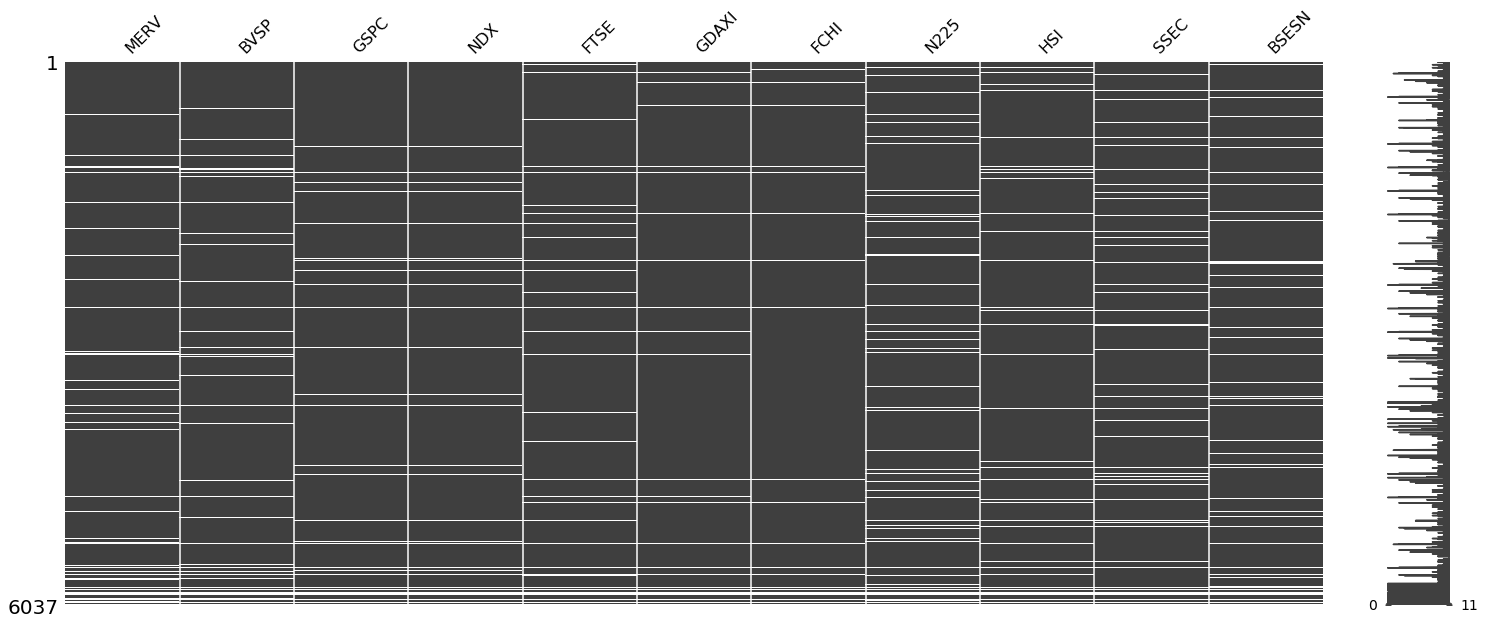

In [12]:
msno.matrix(df);

In [13]:
df[df.index.dayofweek>=5]

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN
FECHA,,,,,,,,,,,
2006-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258.05,NaN
2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los días 5 y 6 de la semana son sábados y domingos. Por lo que podemos observar que **NO hay observaciones los fines de semana**.

In [14]:
df.count()

MERV     5595
BVSP     5653
GSPC     5751
NDX      5751
FTSE     5760
GDAXI    5792
FCHI     5826
N225     5599
HSI      5629
SSEC     5543
BSESN    5620
dtype: int64

A estos valores podemos tratarlos de diferentes maneras:


* No tenerlos en cuenta (eliminar el valor).
* Hacer aproximación por algun método de regresión.

**3) Analice las distribuciones por medio de gráficos (por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). No olvide el análisis de los coeficientes de asimetría y kurtosis.**

**Medidas de estadísticas descriptivas**

In [15]:
for col in df.columns:
    print('\n',col,'\n')
    mean = df[col].mean()
    median = df[col].median()
    var = df[col].var()
    std = df[col].std()
    coef = std/mean
    indice_simetria_pearson = 3*(mean - median)/std
    coef_curtosis = df[col].kurt()
    
    print('MEDIA: ', round(mean,2))
    print('VARIANZA: ', round(var,2))
    print('COEF. DE VARIACION: ', round(coef,4), '=>', round(coef * 100,2), '%')
    print('INDICE DE SIMETRÍA DE PEARSON:', round(indice_simetria_pearson,2))
    print('COEF. DE CURTOSIS:', round(coef_curtosis,2))


 MERV 

MEDIA:  6890.29
VARIANZA:  106479666.88
COEF. DE VARIACION:  1.4976 => 149.76 %
INDICE DE SIMETRÍA DE PEARSON: 1.39
COEF. DE CURTOSIS: 2.13

 BVSP 

MEDIA:  44262.58
VARIANZA:  686943633.55
COEF. DE VARIACION:  0.5921 => 59.21 %
INDICE DE SIMETRÍA DE PEARSON: -0.53
COEF. DE CURTOSIS: -0.59

 GSPC 

MEDIA:  1550.35
VARIANZA:  354020.24
COEF. DE VARIACION:  0.3838 => 38.38 %
INDICE DE SIMETRÍA DE PEARSON: 1.1
COEF. DE CURTOSIS: 0.26

 NDX 

MEDIA:  2974.29
VARIANZA:  3937303.28
COEF. DE VARIACION:  0.6671 => 66.71 %
INDICE DE SIMETRÍA DE PEARSON: 1.29
COEF. DE CURTOSIS: 0.73

 FTSE 

MEDIA:  5878.14
VARIANZA:  959271.76
COEF. DE VARIACION:  0.1666 => 16.66 %
INDICE DE SIMETRÍA DE PEARSON: -0.18
COEF. DE CURTOSIS: -0.62

 GDAXI 

MEDIA:  7224.94
VARIANZA:  8232066.57
COEF. DE VARIACION:  0.3971 => 39.71 %
INDICE DE SIMETRÍA DE PEARSON: 0.76
COEF. DE CURTOSIS: -0.76

 FCHI 

MEDIA:  4389.67
VARIANZA:  852300.35
COEF. DE VARIACION:  0.2103 => 21.03 %
INDICE DE SIMETRÍA DE PEARSON: 

Buscamos el rango de años

In [16]:
year_range = df.index.year.max() - df.index.year.min()

Graficamos histograma y función de distribución en intervalos de un año gracias al rango de años

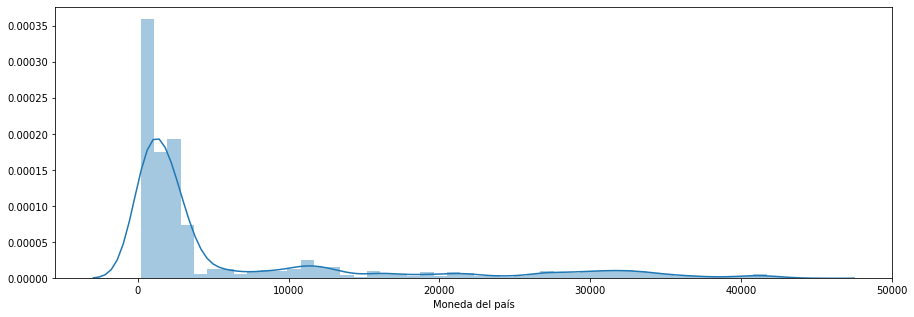

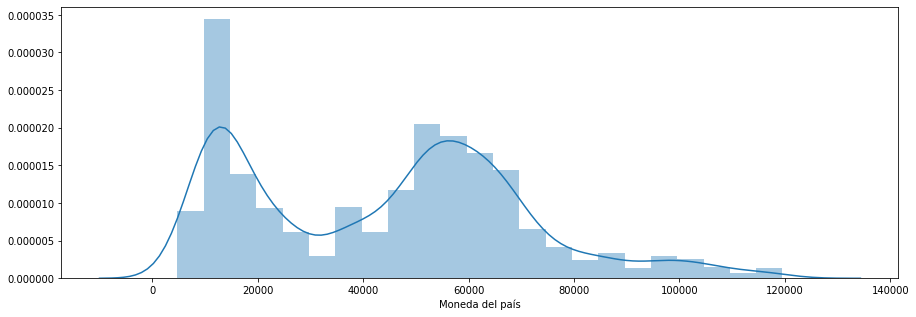

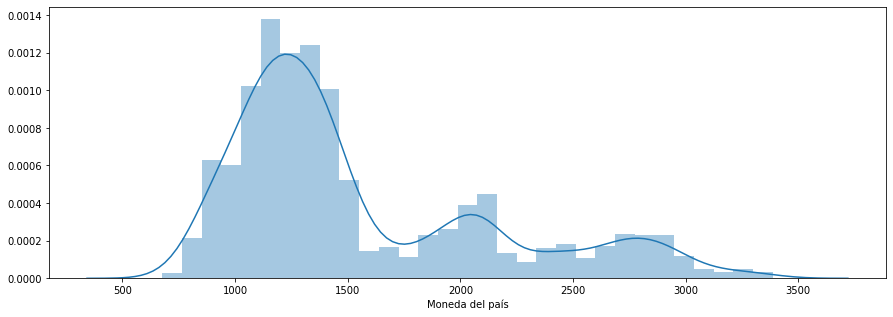

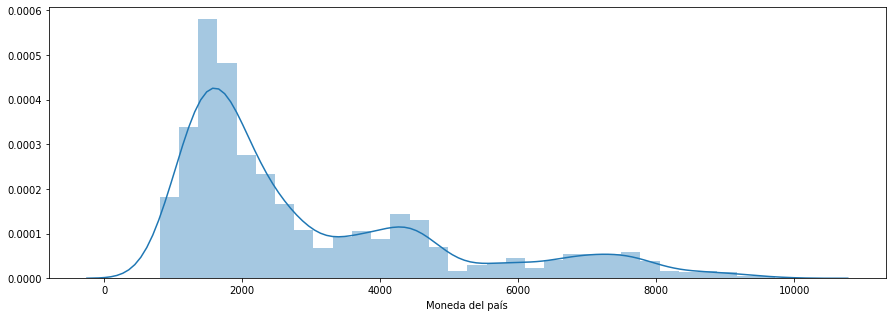

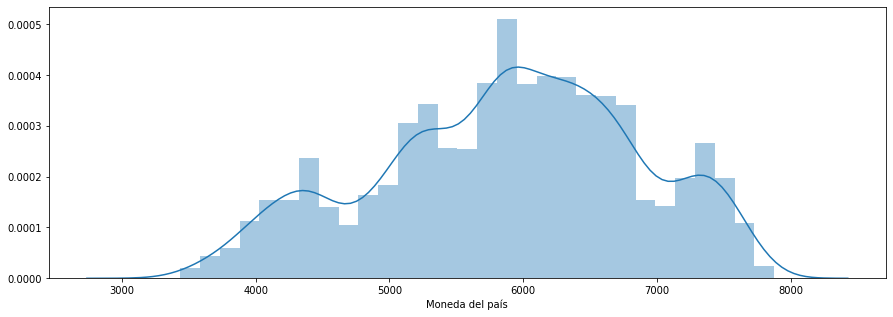

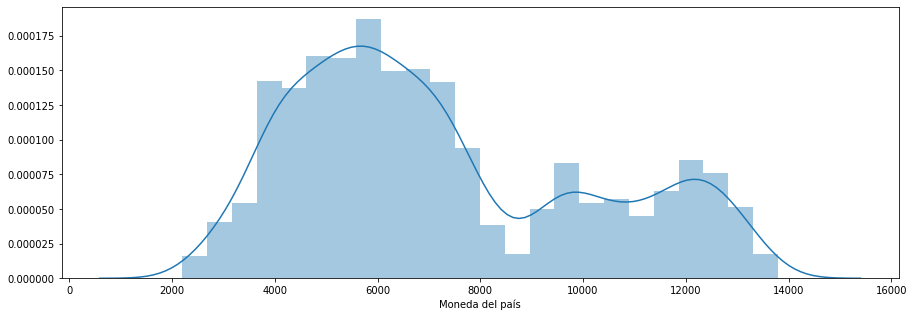

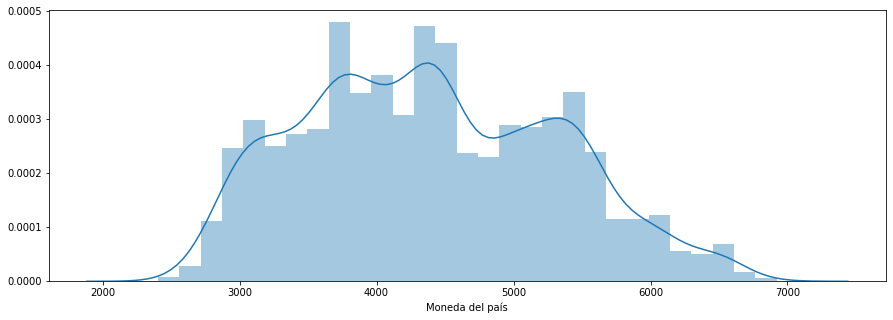

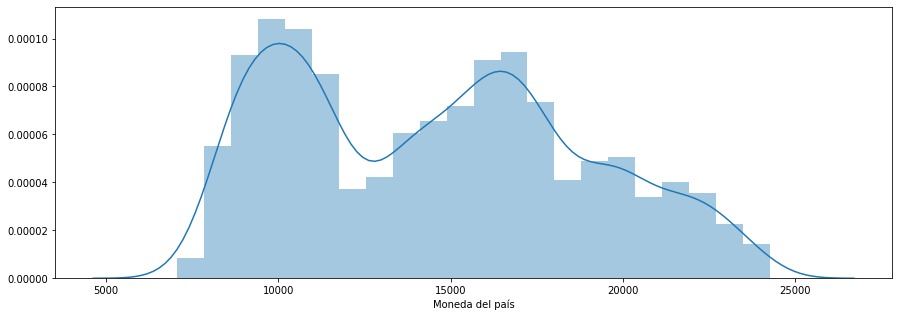

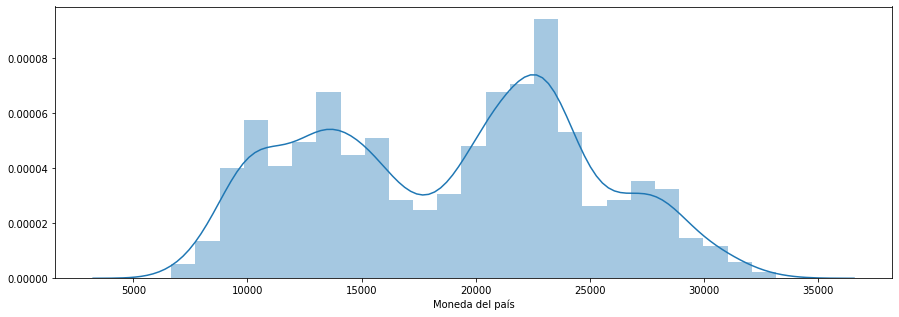

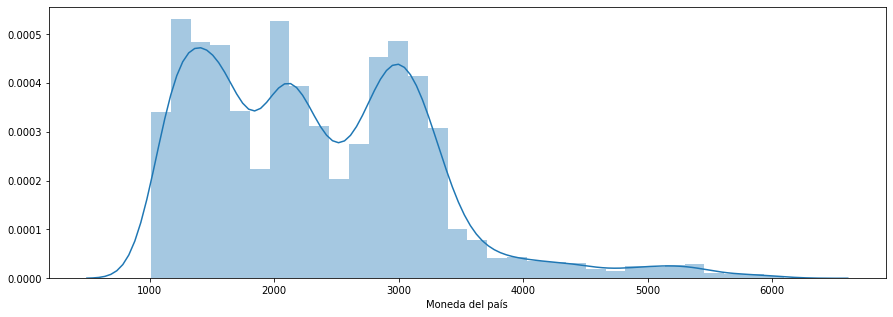

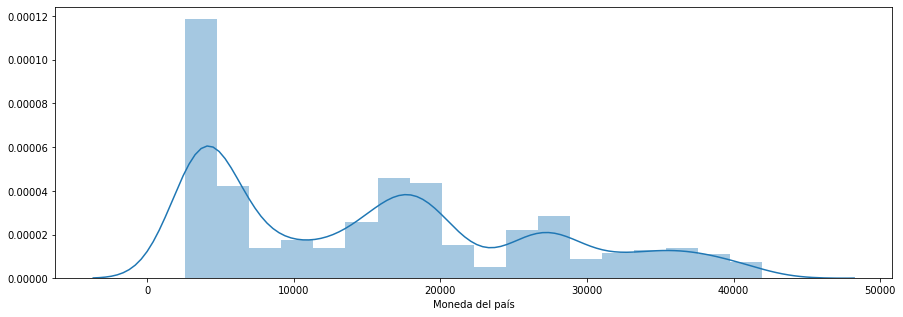

In [17]:
for col in df.columns:
    sns.distplot(df[col].dropna())
    plt.xlabel("Moneda del país")
    plt.show()

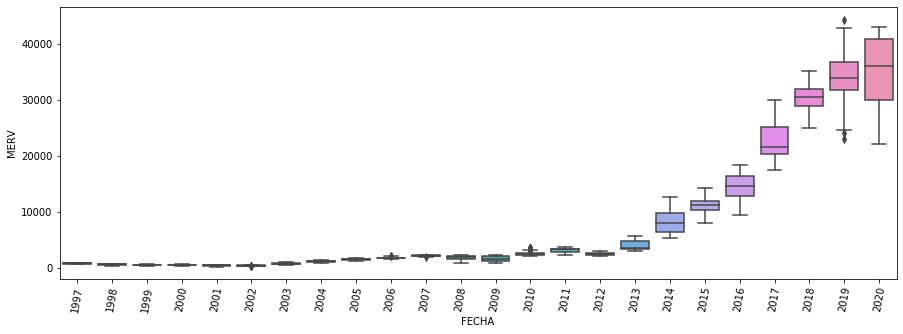

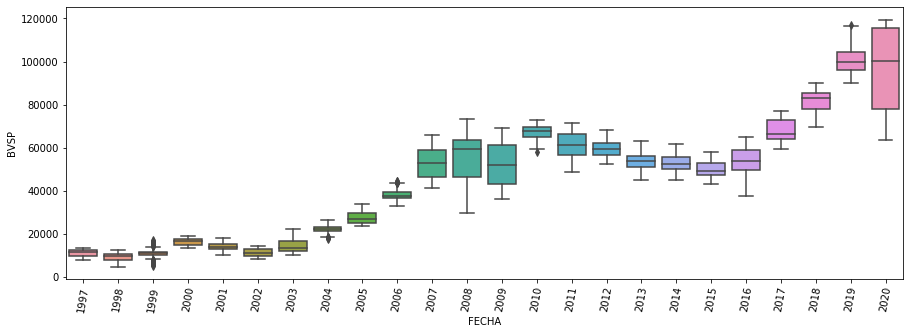

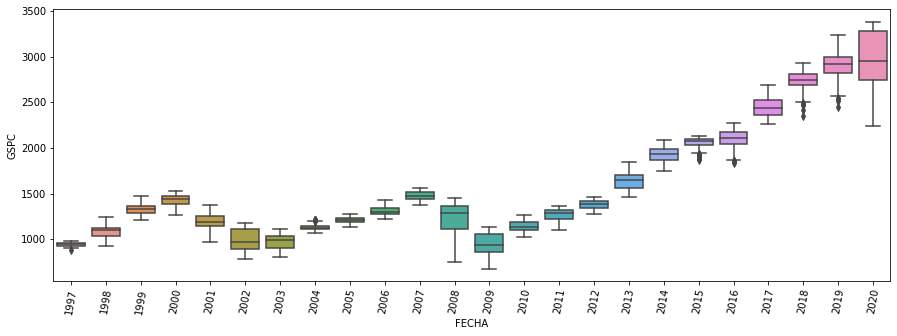

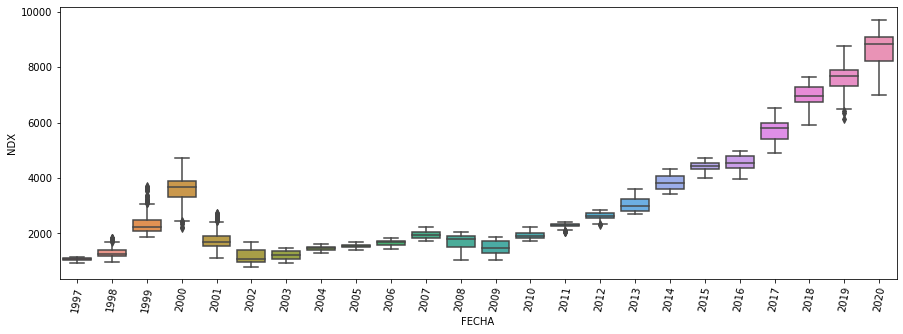

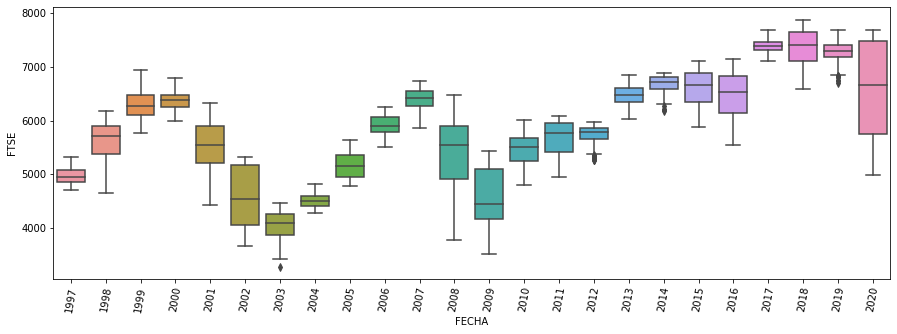

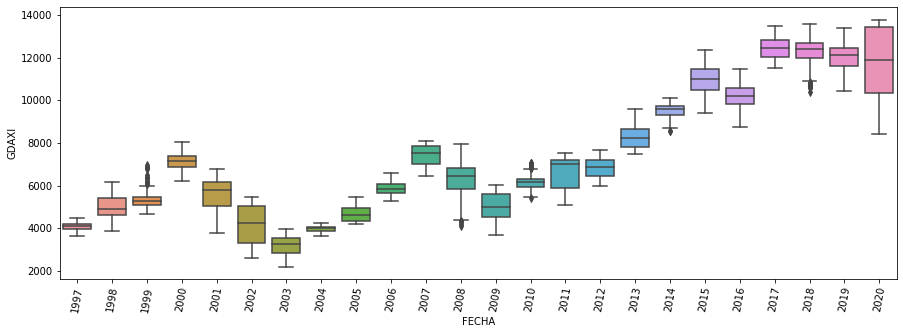

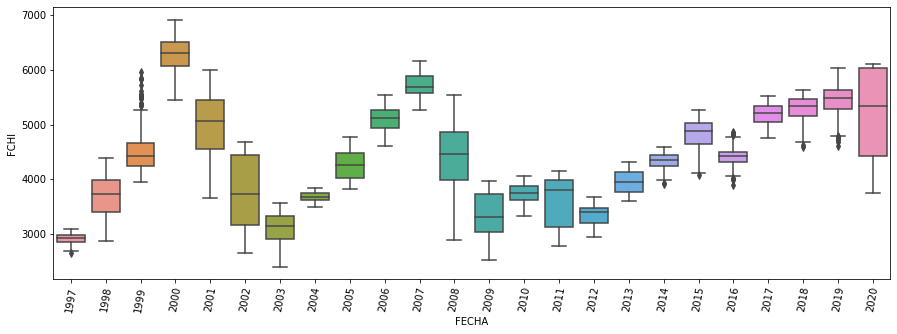

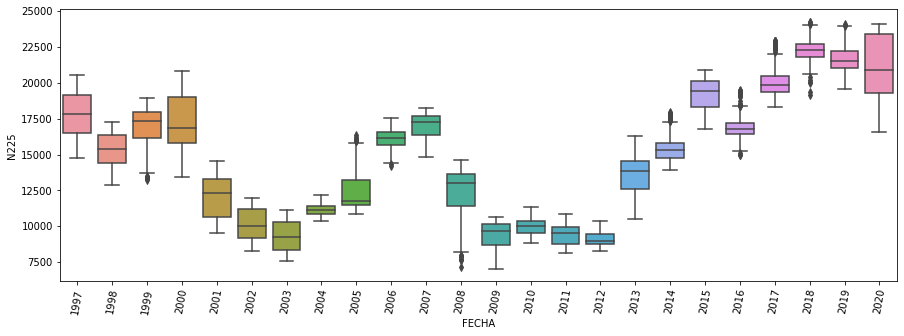

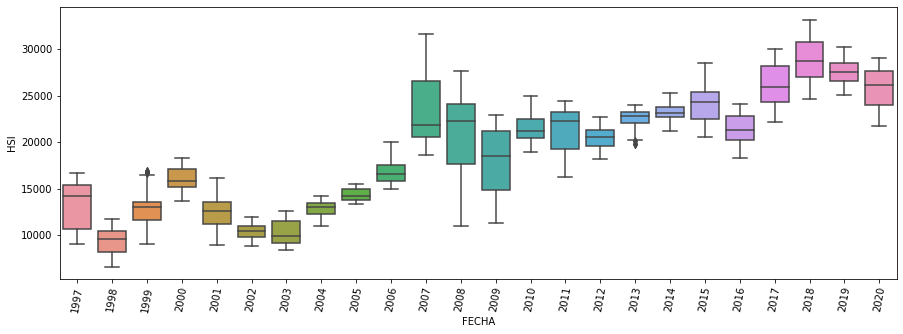

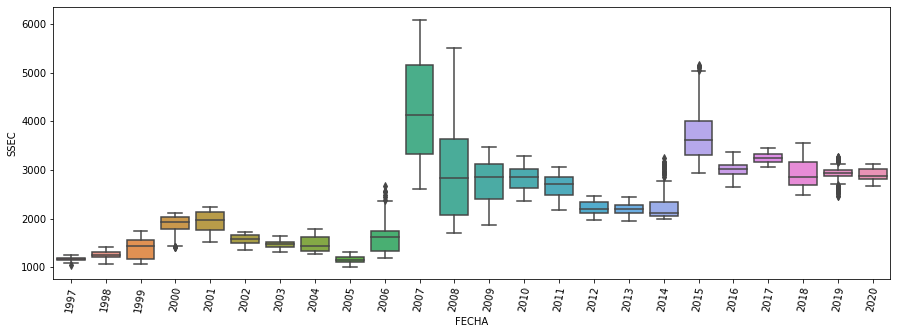

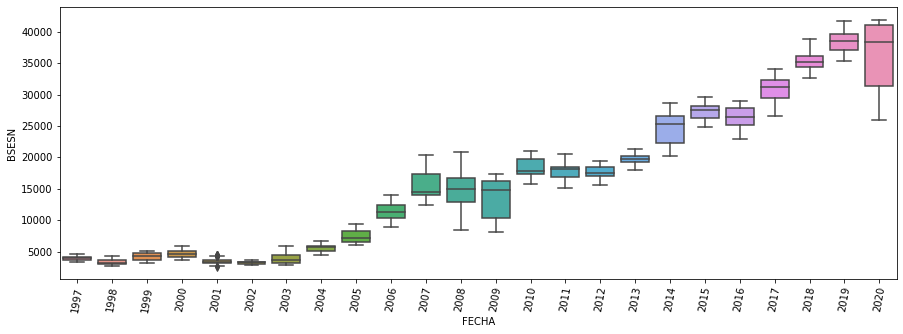

In [18]:
for col in df.columns:
    sns.boxplot(data=df, x=df.index.year, y=col)
    plt.xticks(rotation=80)
    plt.show()

Analizando los boxplots, podemos observar que la distribución estadística de los índices va cambiando año por año, por lo que podemos afirmar que **las series temporales de los índices NO son estacionarias**.

**4) ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?**

Mirando los datos a nivel global, no se ven muchos outliers. En especial en el boxplot, pueden observarse algunos puntos que están alejados de su media, pero no se observa magnitud tal que sugieran errores en la carga de los datos.
Es complejo el proceso de detección de outliers en series de tiempo, ya que como veremos las distribuciones de los índices son diferentes año a año, por lo que no podemos utilizar el método tradicional para detectar los valores atípicos.

Para identificar los outliers, se utilizaron dos métodos. Identificación a través de la base recalculada con la media móvil de cada variable, con una ventana de 5 observaciones (es decir, periodo semanal) e identificación con los valores originales de la base.

**Identificación outliers a través del cálculo de la media móvil**

In [19]:
#Para calcular la media móvil de cada variable, se eliminaron los datos correspondientes a los días Sabado y Domingo 
#que contenian valores nulos dado que no se miden estos índices los fines de semana. Además, los valores faltantes se completaron con el valor inmediato anterior.
#Esto debido a que si no no es posible calcular la media.

data_rm = df
data_rm = data_rm[data_rm.index.dayofweek<5]
data_rm = data_rm.fillna(method='ffill')

data_rm = data_rm.rolling(window=5).mean()
data_rm.columns = ['MERV_rm', 'BVSP_rm', 'GSPC_rm', 'NDX_rm', 'FTSE_rm', 'GDAXI_rm', 'FCHI_rm', 'N225_rm', 'HSI_rm', 'SSEC_rm', 'BSESN_rm']
data_rm.dropna()

,MERV_rm,BVSP_rm,GSPC_rm,NDX_rm,FTSE_rm,GDAXI_rm,FCHI_rm,N225_rm,HSI_rm,SSEC_rm,BSESN_rm
FECHA,,,,,,,,,,,
1997-07-09,840.748010,13503.0,914.465991,995.997998,4795.220019,3989.376025,2939.920020,19869.128126,14846.640042,1127.458,4329.962012
1997-07-10,843.584009,13567.8,913.838000,1000.701990,4782.439941,4001.560010,2938.340039,19795.801954,14803.340042,1121.364,4340.944043
1997-07-11,846.118005,13499.6,913.790002,1006.521985,4779.779980,4027.074024,2939.760059,19777.300000,14883.800004,1120.454,4340.576074
1997-07-14,845.008008,13338.8,915.026001,1016.689990,4789.119922,4054.841992,2938.540088,19882.010156,14986.260160,1138.234,4327.290039
1997-07-15,837.323999,12938.8,916.428003,1027.331995,4817.279883,4076.758008,2942.720069,19925.114062,15125.260160,1156.322,4310.216016
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,32824.569920,80874.2,2877.755957,8842.631836,5898.379981,10818.689844,4552.698047,19794.953514,24424.106248,2842.540,32797.054296
2020-05-05,32920.905858,80506.0,2878.765967,8893.235938,5876.559961,10805.455860,4535.366016,19764.585546,24282.646092,2852.552,32664.852344
2020-05-06,33115.673828,79684.6,2860.547949,8893.656055,5824.259961,10705.147854,4487.820020,19734.217578,24181.424218,2863.692,32457.970312


In [20]:
def find_outliers(data, selected_index, year, number_of_stds):
    """Returns ouliers based on a number of standard deviations from the mean (number_of_stds) for a given column (selected_score)
    for a given year (year)
    """
    outliers = []
    # Filtro por año
    filtro = data[data.index.year.isin([year])]
    datos = filtro[selected_index]
    media = datos.mean()
    varianza = datos.std()
    #print("Media: ", media, "Varianza: ", varianza)
    for i in datos:
        if np.abs(i-media) > number_of_stds*varianza:
            outliers.append(i)    
    return outliers


In [21]:
for indice in data_rm.columns:
    print()
    for year in range(1970, 2020):
        num_outliers = len(find_outliers(data_rm,indice,year,2.5))
        if num_outliers > 0:
            print('Para el índice {}, en el año {} se encontraron {} valores outliers.'.format(indice, year, num_outliers))


Para el índice MERV_rm, en el año 2006 se encontraron 3 valores outliers.
Para el índice MERV_rm, en el año 2007 se encontraron 2 valores outliers.
Para el índice MERV_rm, en el año 2010 se encontraron 1 valores outliers.

Para el índice BVSP_rm, en el año 1999 se encontraron 7 valores outliers.
Para el índice BVSP_rm, en el año 2006 se encontraron 1 valores outliers.
Para el índice BVSP_rm, en el año 2010 se encontraron 3 valores outliers.
Para el índice BVSP_rm, en el año 2019 se encontraron 5 valores outliers.

Para el índice GSPC_rm, en el año 2000 se encontraron 2 valores outliers.
Para el índice GSPC_rm, en el año 2004 se encontraron 6 valores outliers.
Para el índice GSPC_rm, en el año 2012 se encontraron 1 valores outliers.
Para el índice GSPC_rm, en el año 2015 se encontraron 5 valores outliers.
Para el índice GSPC_rm, en el año 2018 se encontraron 7 valores outliers.
Para el índice GSPC_rm, en el año 2019 se encontraron 5 valores outliers.

Para el índice NDX_rm, en el año 1

**Identificación outliers utilizando base original**

In [22]:
for indice in df.columns:
    print()
    for year in range(1970, 2020):
        num_outliers = len(find_outliers(df,indice,year,2.5))
        if num_outliers > 0:
            print('Para el índice {}, en el año {} se encontraron {} valores outliers.'.format(indice, year, num_outliers))


Para el índice MERV, en el año 2006 se encontraron 2 valores outliers.
Para el índice MERV, en el año 2007 se encontraron 1 valores outliers.
Para el índice MERV, en el año 2010 se encontraron 2 valores outliers.
Para el índice MERV, en el año 2019 se encontraron 1 valores outliers.

Para el índice BVSP, en el año 1999 se encontraron 7 valores outliers.
Para el índice BVSP, en el año 2004 se encontraron 1 valores outliers.
Para el índice BVSP, en el año 2006 se encontraron 2 valores outliers.
Para el índice BVSP, en el año 2010 se encontraron 2 valores outliers.
Para el índice BVSP, en el año 2019 se encontraron 4 valores outliers.

Para el índice GSPC, en el año 1997 se encontraron 1 valores outliers.
Para el índice GSPC, en el año 2000 se encontraron 2 valores outliers.
Para el índice GSPC, en el año 2001 se encontraron 1 valores outliers.
Para el índice GSPC, en el año 2004 se encontraron 5 valores outliers.
Para el índice GSPC, en el año 2011 se encontraron 1 valores outliers.
Par

**5) Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución?**

En el punto anterior pudimos ver gráficos de cajas para los distintos años de los distintos índices. Podemos ver que **NO se mantiene inalterada la distribución** a lo largo de los años, sino que va fluctuando.


 YEAR  1997


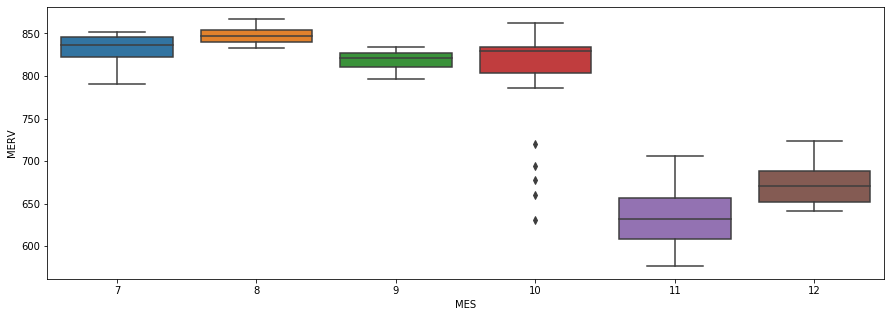


 YEAR  1998


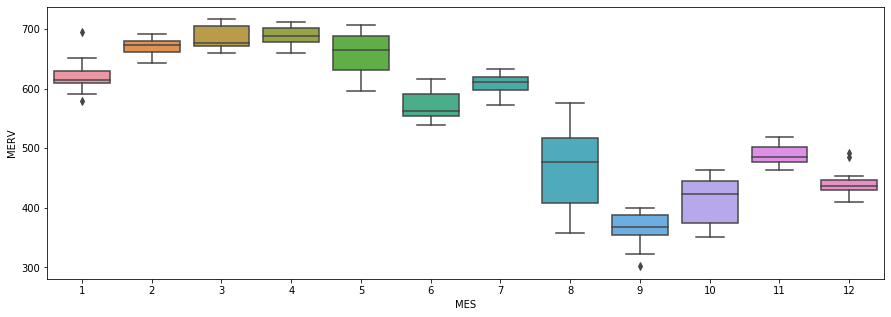


 YEAR  1999


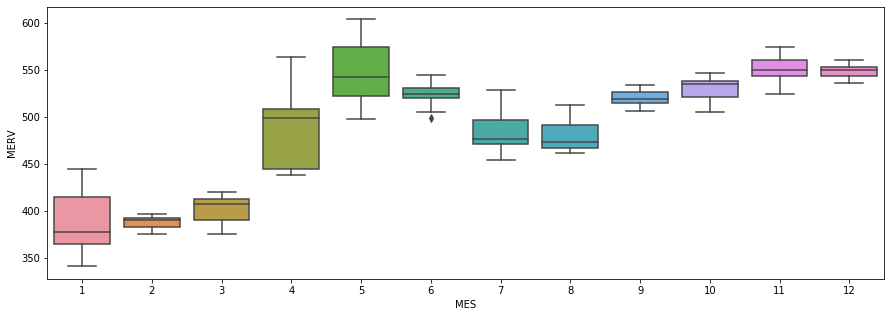


 YEAR  2000


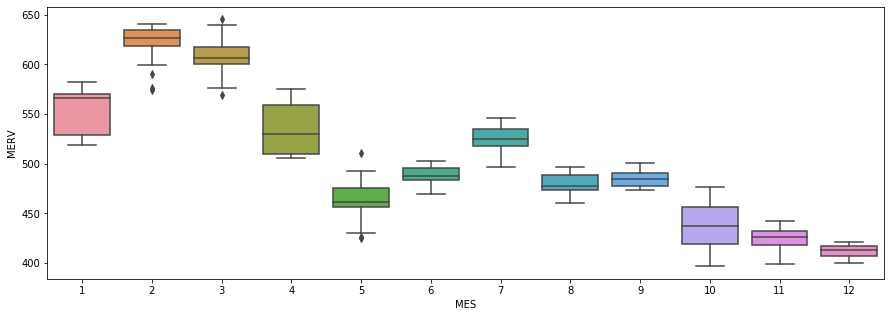


 YEAR  2001


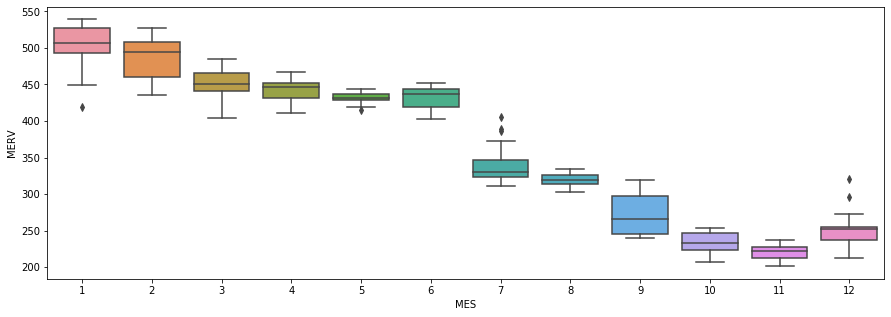


 YEAR  2002


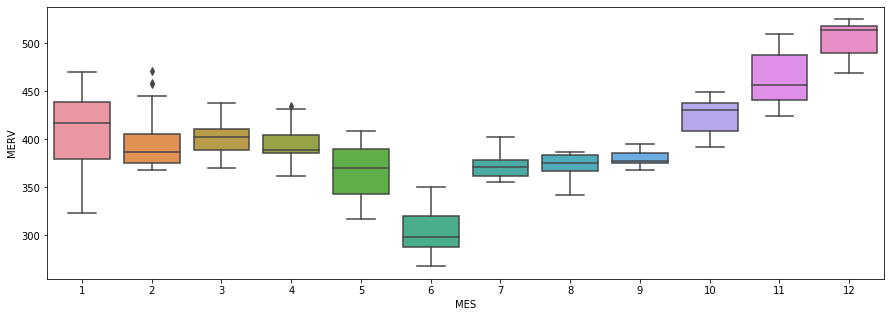


 YEAR  2003


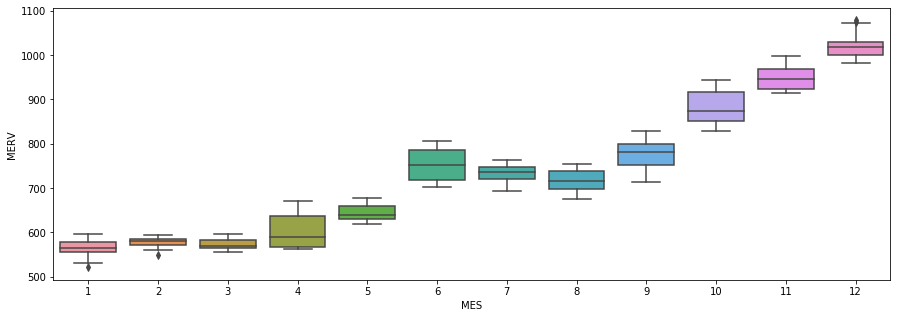


 YEAR  2004


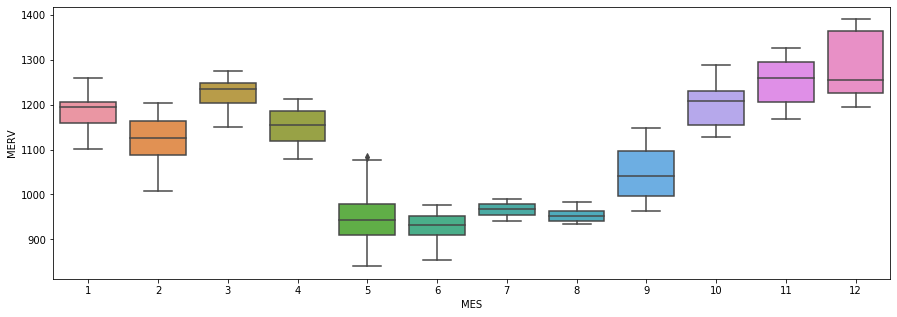


 YEAR  2005


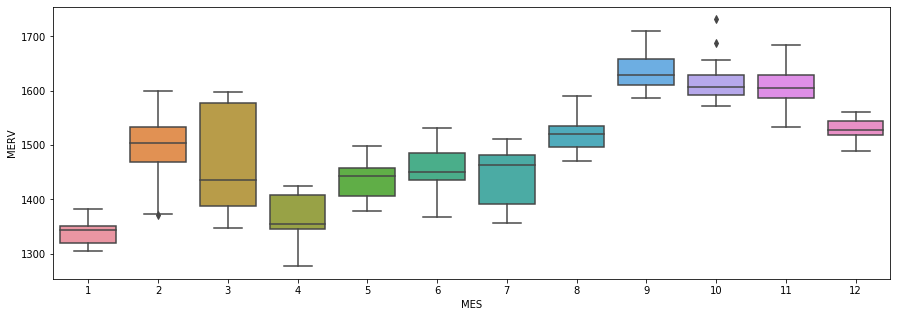


 YEAR  2006


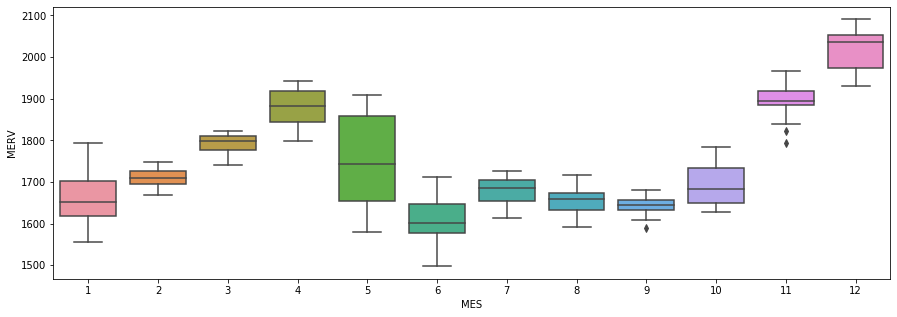


 YEAR  2007


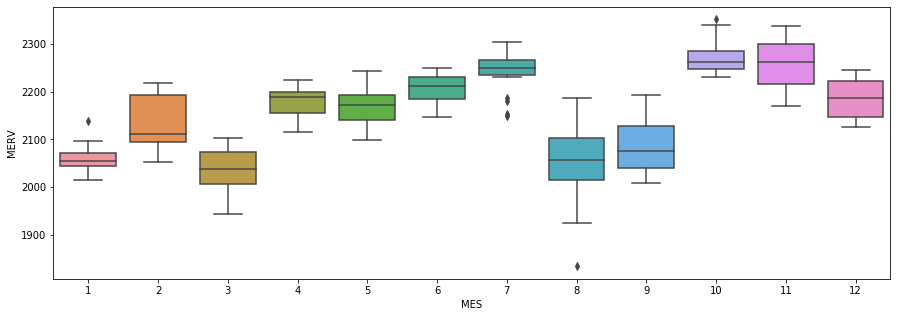


 YEAR  2008


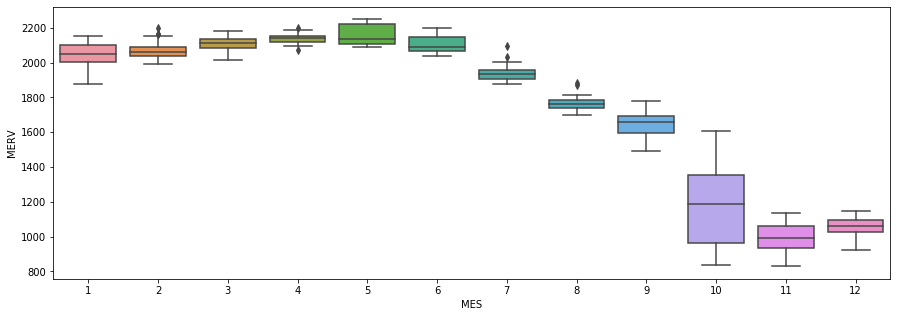


 YEAR  2009


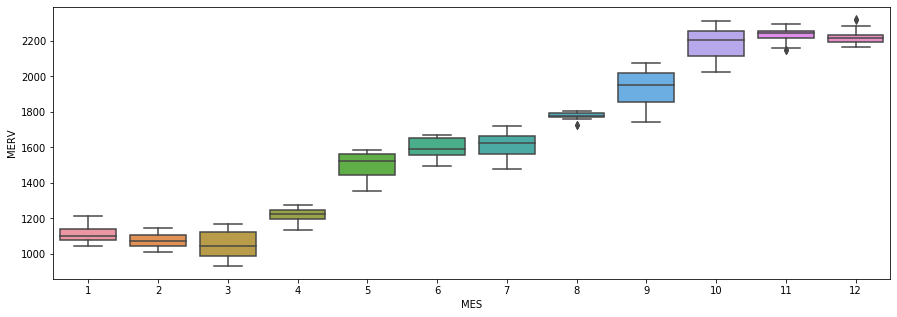


 YEAR  2010


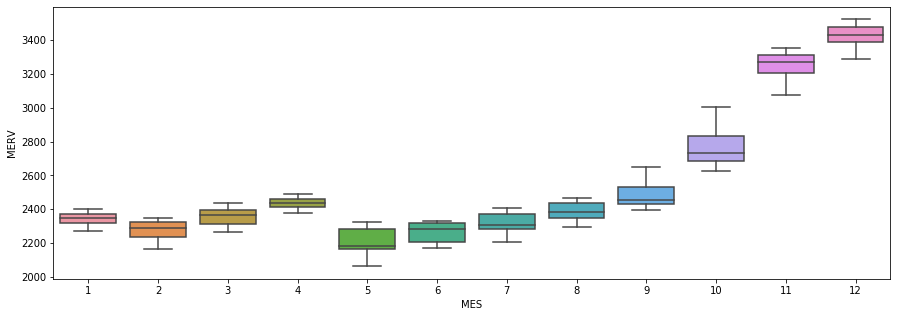


 YEAR  2011


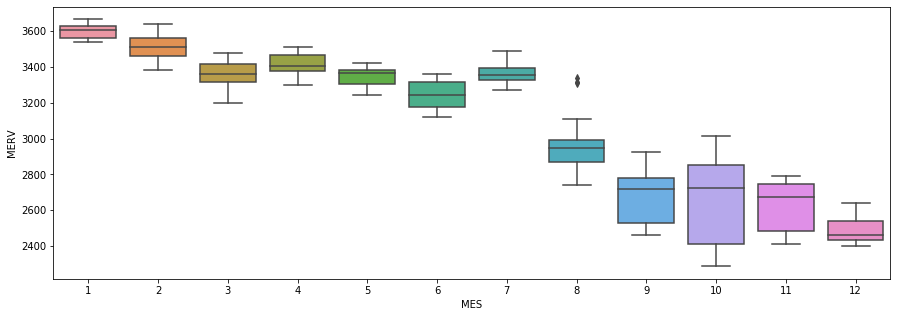


 YEAR  2012


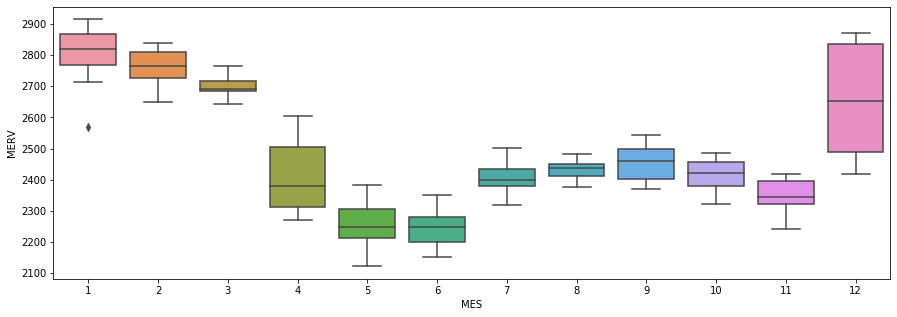


 YEAR  2013


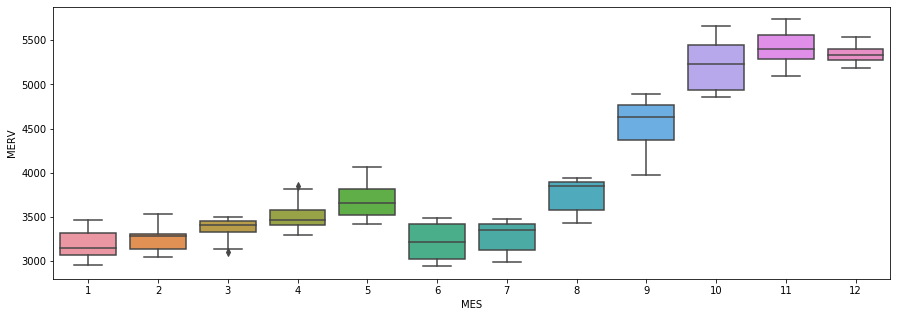


 YEAR  2014


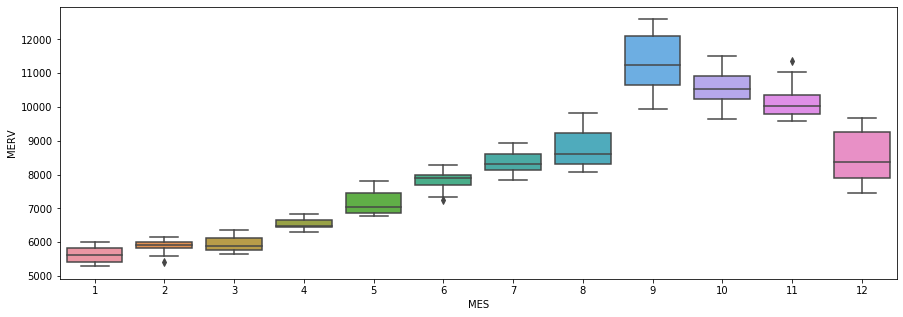


 YEAR  2015


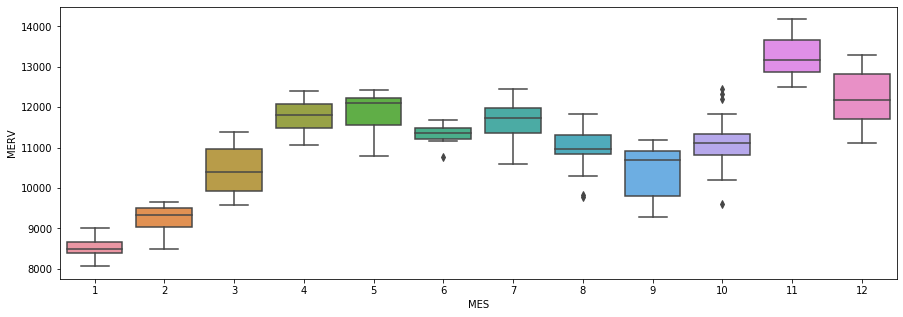


 YEAR  2016


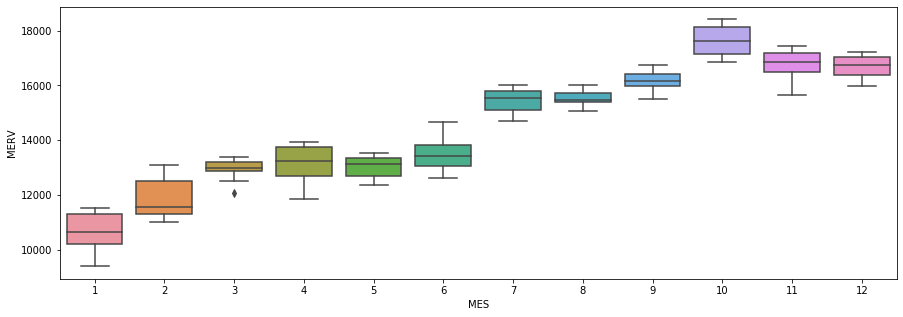


 YEAR  2017


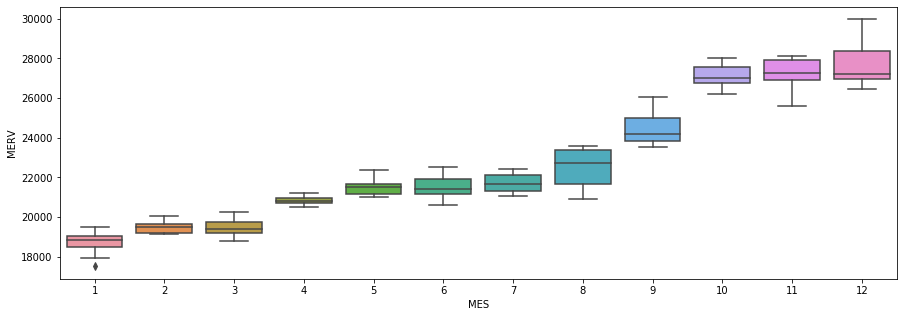


 YEAR  2018


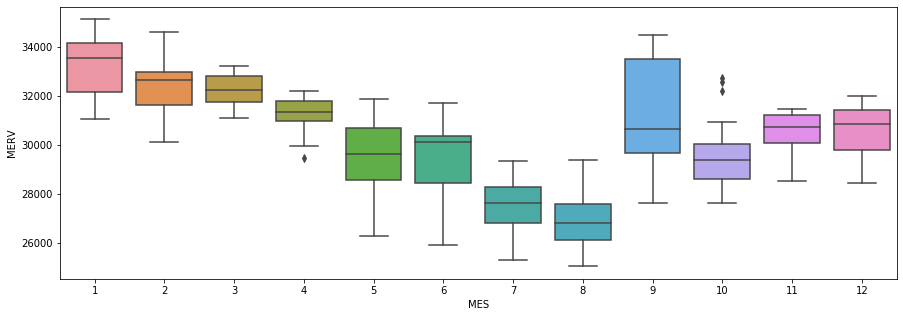


 YEAR  2019


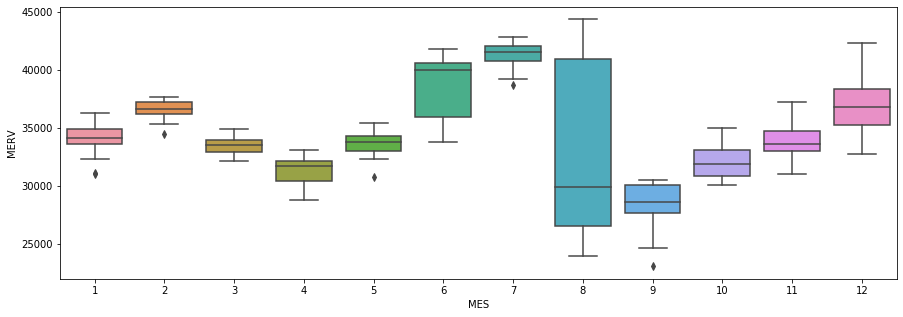


 YEAR  2020


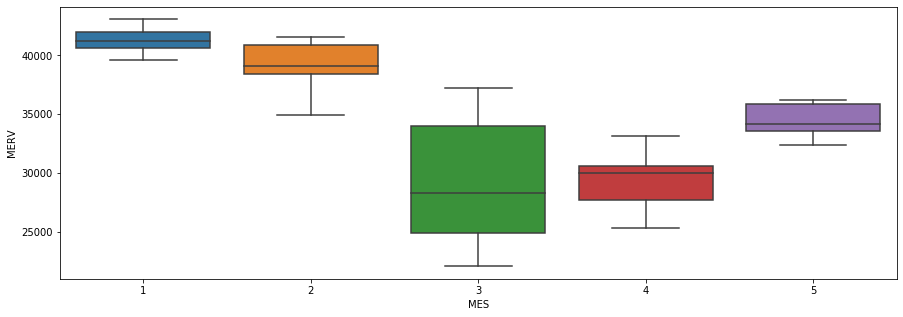

In [23]:
month_segment = pd.cut(df.index.month, bins=11)
for year in df.index.year.unique():
    print('\n YEAR ', year)
    filter_ = df.index.year == year
    sns.boxplot(x=df.index.month[filter_], y=df['MERV'][filter_])
    plt.xlabel('MES')
    plt.xticks(rotation=0)
    plt.show()

**6) Explore la existencia de estacionalidad.**

Una serie se puede ver como un proceso estacionario si:
1. Su media es constante en el tiempo.
2. Su varianza es constante en el tiempo.
3. Su estructura de autocorrelación es constante en el tiempo.

A continuación graficaremos la media de los valores de los índices y su desviación standar para una ventana de 60 días (aprox 2 meses) para ver el comportamiento de estas medidas a lo largo del tiempo.

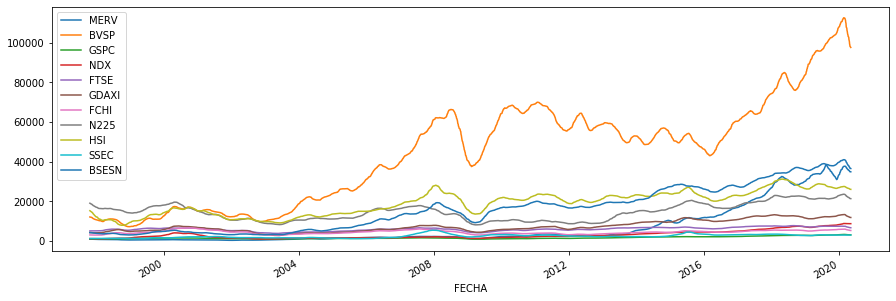

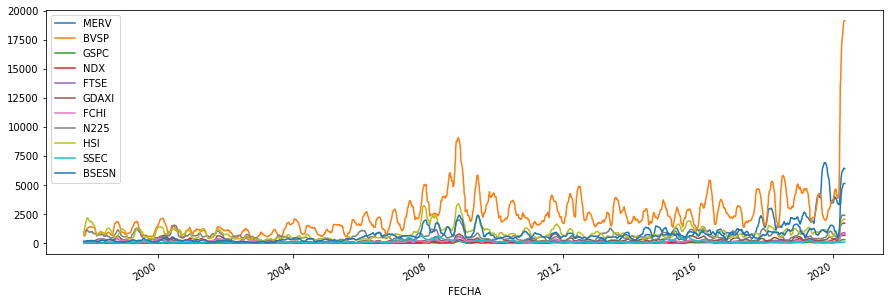

In [51]:
df.dropna().rolling(window=60).mean().plot()
df.dropna().rolling(window=60).std().plot()

De los gráficos anteriores podemos decir que ni la media ni la desviación stardar son constantes en el tiempo, aunque se podrían identificar algunos momentos (cortos) de estacionalidad para algunos índices, como el Merval al comienzo del periodo de estudio.

**7) Estudie la evolución temporal de los índices. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis(caídas fuertes y repentinas de los índices)? ¿Coinciden con las noticias? ¿Los índices tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o propias de mercados individuales?** 

**Evolución temporal de la serie sin normalizar**

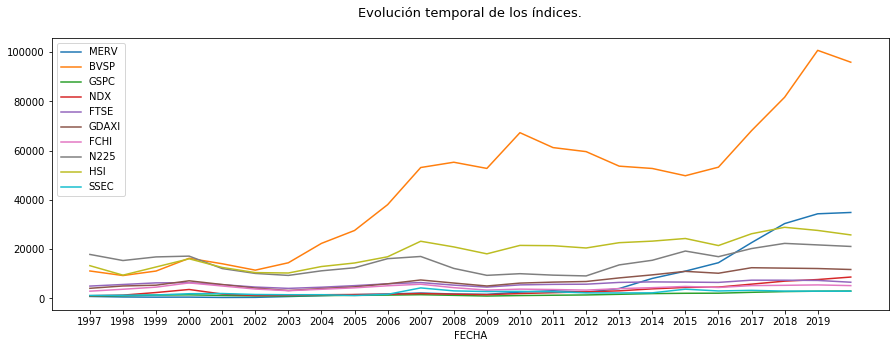

In [25]:
selected_indexes = ["MERV", "BVSP", "GSPC", "NDX", "FTSE", "GDAXI", "FCHI", "N225", "HSI", "SSEC"]
data = df[selected_indexes]
new_data = data.groupby(df.index.year).mean()
ax = sns.lineplot(data=new_data, hue= ["MERV", "BVSP", "GSPC", "NDX", "FTSE", "GDAXI", "FCHI", "N225", "HSI", "SSEC"], dashes=False)
ax.set_xticks(np.arange(data.index.year.min(), data.index.year.max(), step=1))
plt.title("Evolución temporal de los índices.\n", fontdict={'fontsize': 13})
plt.show()

**Evolución temporal de la serie normalizada**

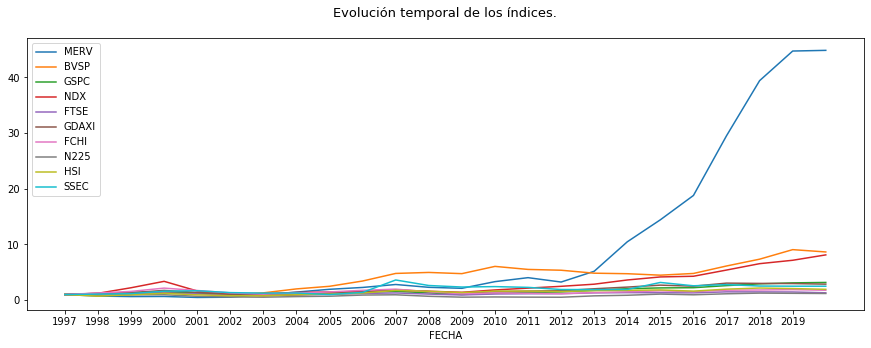

In [26]:
#PRUEBA
selected_indexes = ["MERV", "BVSP", "GSPC", "NDX", "FTSE", "GDAXI", "FCHI", "N225", "HSI", "SSEC"]
data_test = df[selected_indexes]

#Elimina fines de semana y rellena los valores nulos para poder calcular los números índices. El primer valor de la columna "HSI" es nulo y no permite construir el índice.
data_test = data_test[data_test.index.dayofweek<5]
data_test = data_test.fillna(method='ffill')
data_test['HSI'] = data_test.HSI.fillna(method='bfill')

data_test = data_test.groupby(data_test.index.year).mean()

normalize = data_test.iloc[0]

data_test = data_test/normalize

ax = sns.lineplot(data=data_test, hue= ["MERV", "BVSP", "GSPC", "NDX", "FTSE", "GDAXI", "FCHI", "N225", "HSI", "SSEC"], dashes=False)
ax.set_xticks(np.arange(data_test.index.min(), data_test.index.max(), step=1))
plt.title("Evolución temporal de los índices.\n", fontdict={'fontsize': 13})
plt.show()

### CRISIS
Analizando las variables, podemos ver que en el año 2000 hay una crisis a nivel mundial. Todos los índices decaen abruptamente este año. Luego los países comienzan a remontar suavemente su actividad económica y puede verse otra crisis en el año 2007. En el año 2009 hay otra crisis, donde algunos mercados aumentan abruptamente su actividad económica.

**8) Investigue si los índices tienden a moverse en forma conjunta. ¿Siempre se da dicho patrón?**

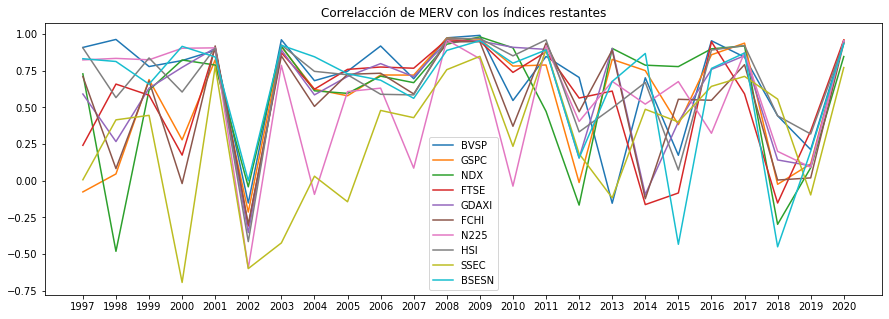

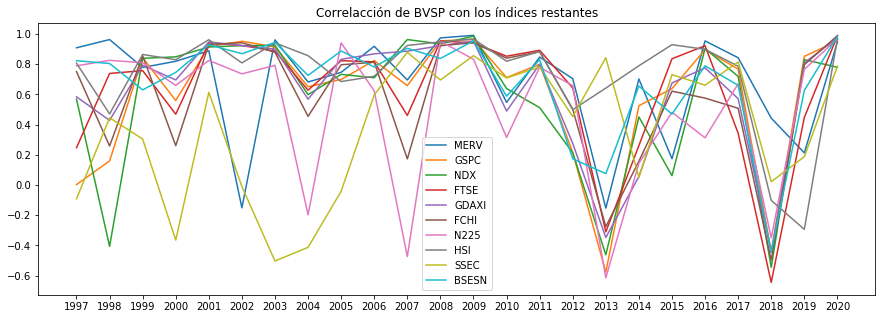

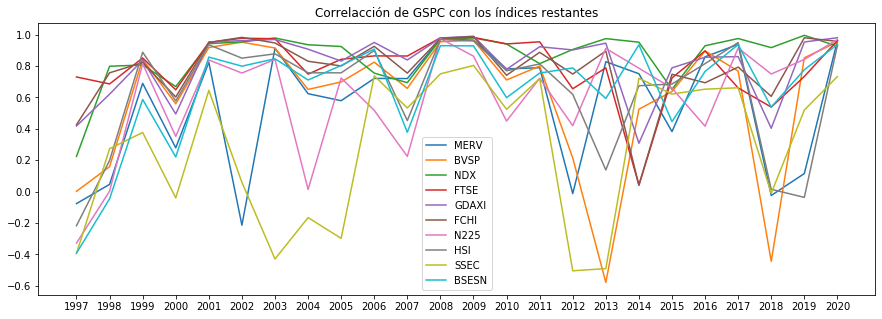

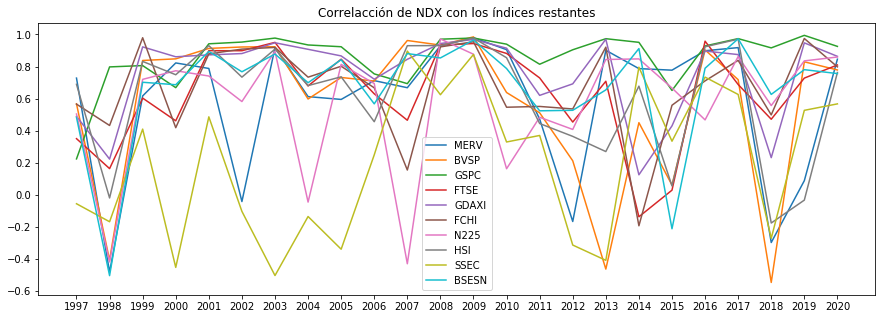

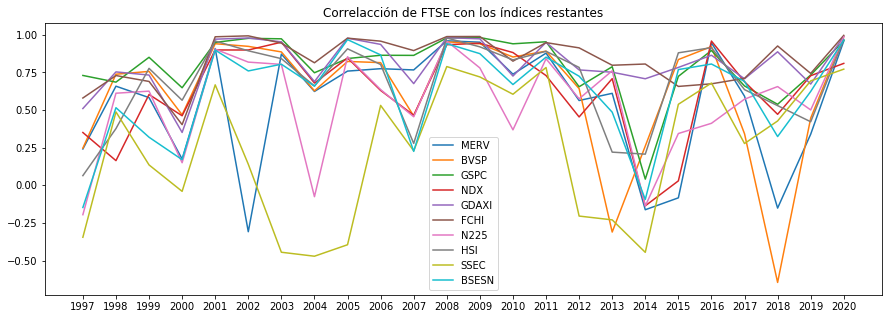

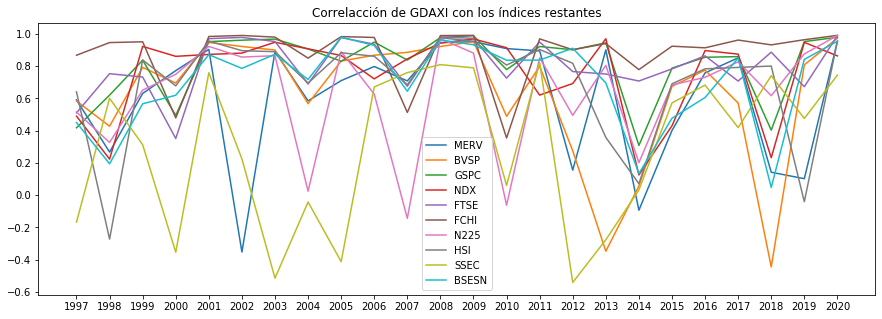

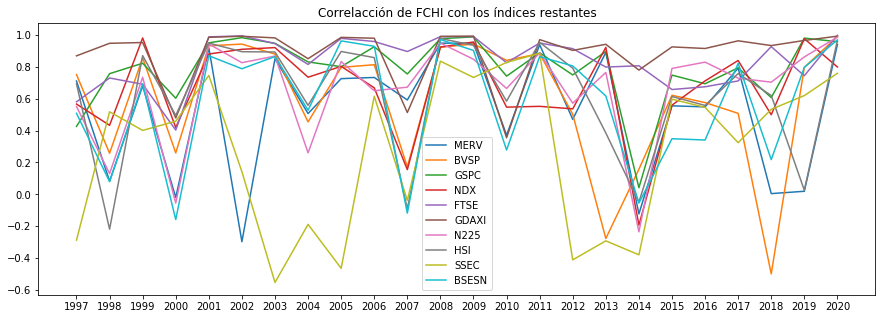

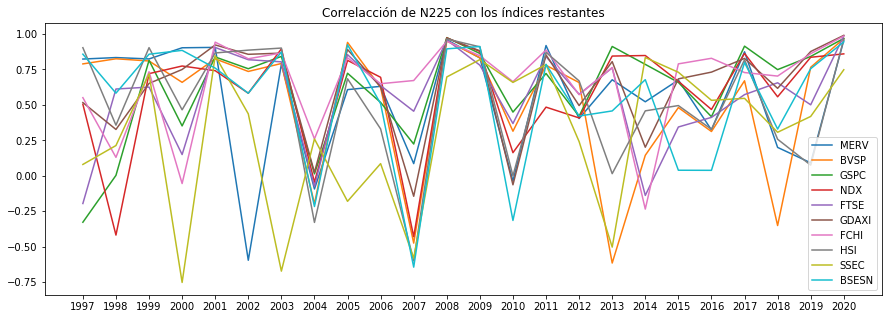

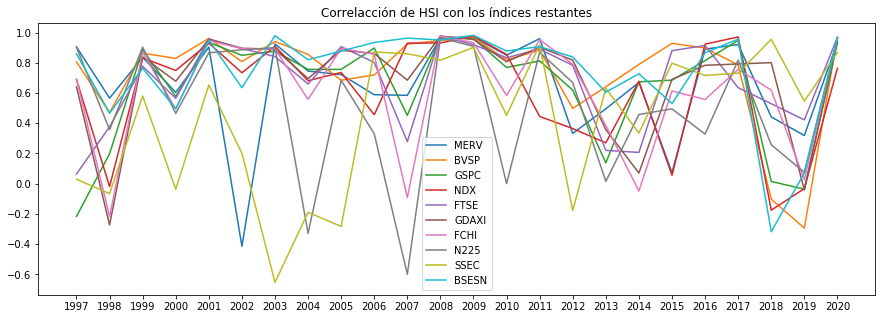

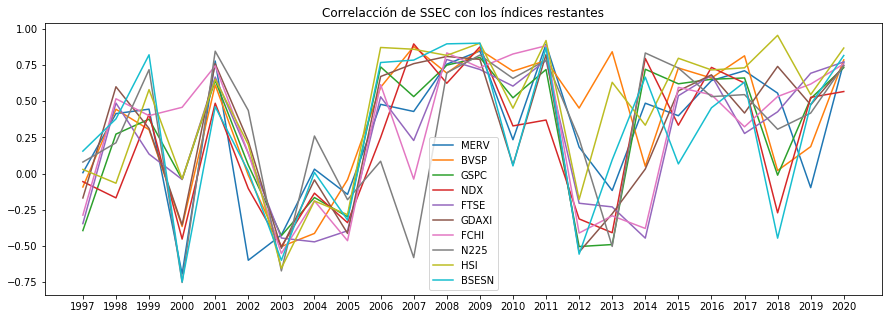

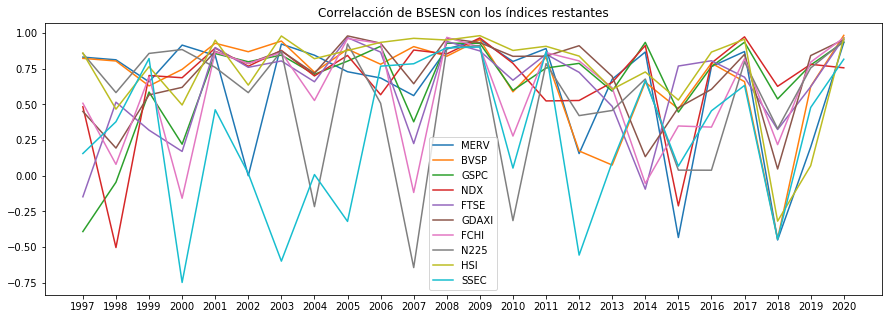

In [27]:
years = [year for year in df.index.year.unique()]
for index in df.columns:
    aux = pd.DataFrame()    
    for index_ in df.columns.drop(index):
        list_corr = []
        for year in df.index.year.unique():
            corr = df[[index, index_]][df[[index, index_]].index.year == year].corr().iloc[0,1]
            list_corr.append(corr)
            
        aux['{}'.format(index_)] = list_corr
    ax = aux.plot(xticks=range(24))
    ax.set_xticklabels(years)
    plt.title('Correlacción de {} con los índices restantes'.format(index))
    del aux

Otra forma de ver la correlacion entre los distintos indices es graficando un mapa de calor de los mismos

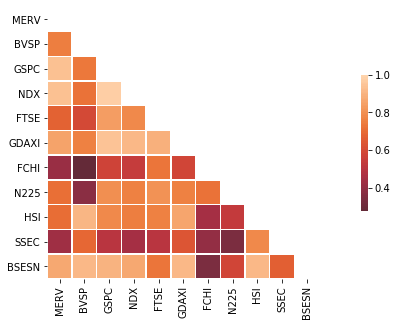

In [28]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Como muestran los gráficos anteriores, hay algunos años donde la correlación entre los índices es alto, esto es un indicio de que se mueven en forma conjunta. Cuando las curvas se separan (poca correlación), **significa crisis local** en el país cuyo índice estamos analizando, **o gran expansión** del mismo.

**9) Seleccione un índice y confeccione un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento entre el índice y su valores retardado 2, 3 y 4 períodos.**

A continuación tomamos el índice Merval y graficamos el valor de índice contra sus valores retardados en n períodos con n=1,...,4.

In [29]:
#Armo un df con el indice elegido y sus n retarnos
df_retardo = df[['MERV']].dropna()
for i in range(1,5):
    df_retardo['MERV_shift_{}'.format(i)] = df_retardo.MERV.shift(i)

Valores del índice contra su retardo en 1 periodos


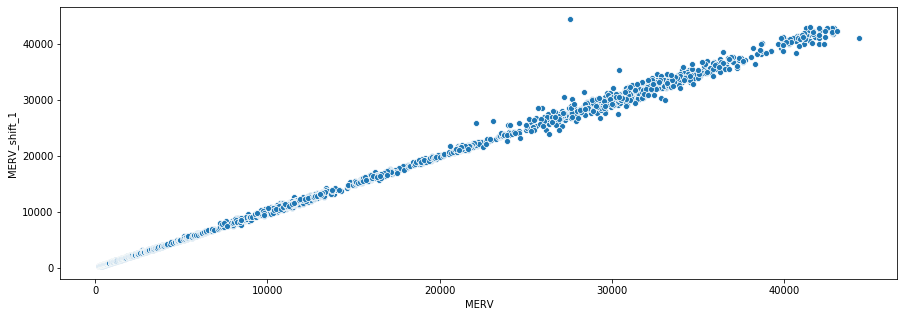


Valores del índice contra su retardo en 2 periodos


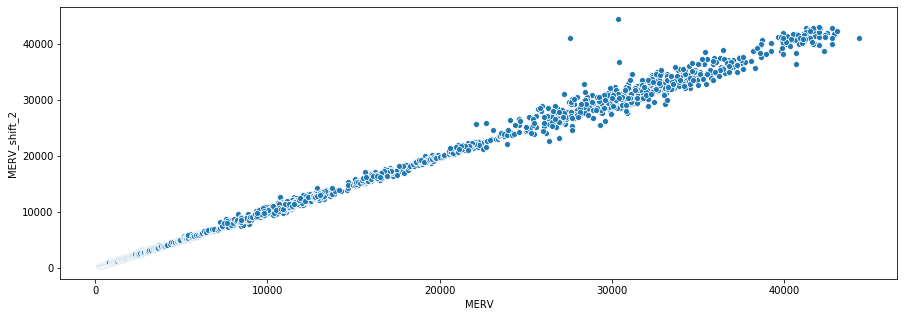


Valores del índice contra su retardo en 3 periodos


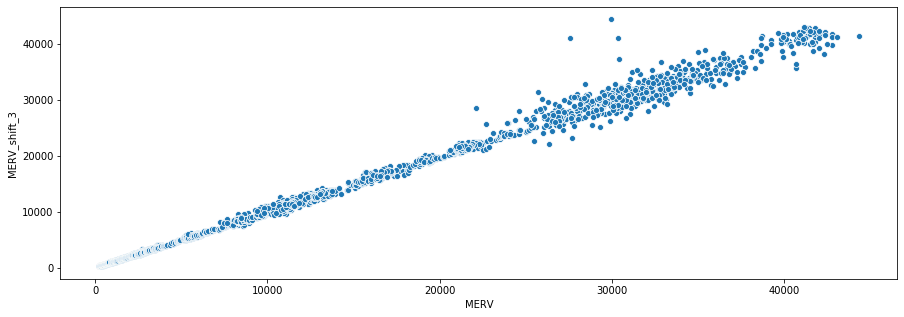


Valores del índice contra su retardo en 4 periodos


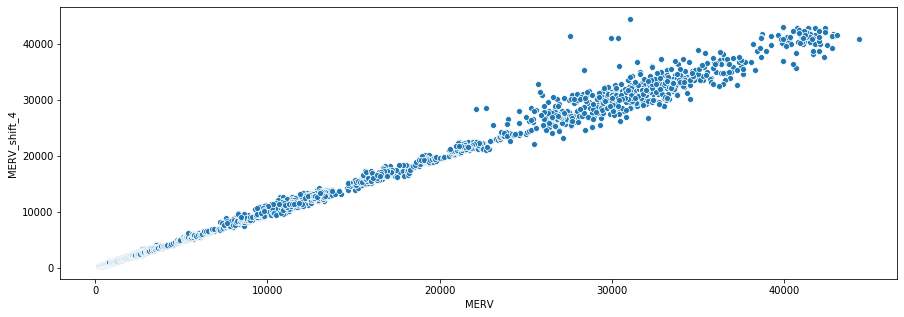

In [30]:
#Diagramas de dispersión
for i in range(1,5):
    print('Valores del índice contra su retardo en {} periodos'.format(i))
    ax = sns.scatterplot(x="MERV", y=df_retardo.columns[i], data=df_retardo)
    plt.show()
    print()

**10) Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación.**

Función de autocorrelación y autocorrelación parcial para el índice MERV.


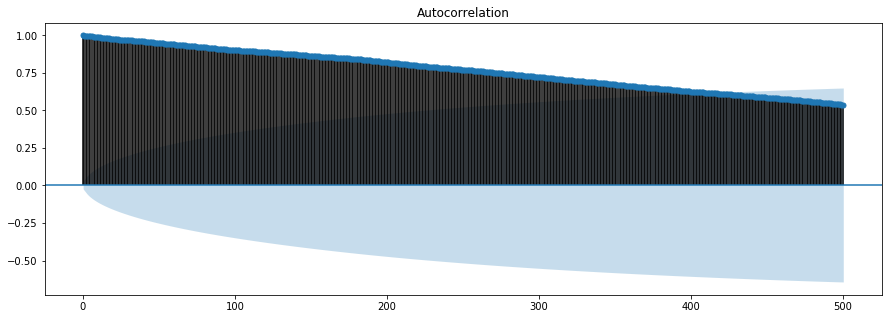

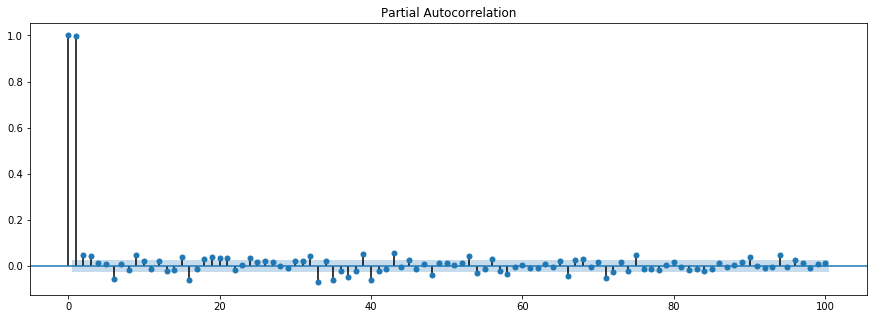

Función de autocorrelación y autocorrelación parcial para el índice BVSP.


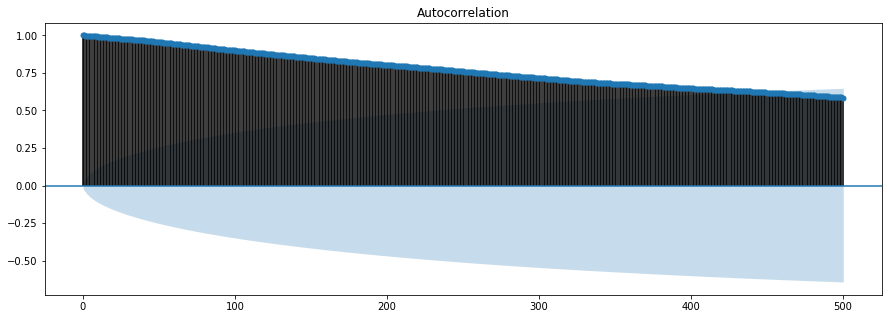

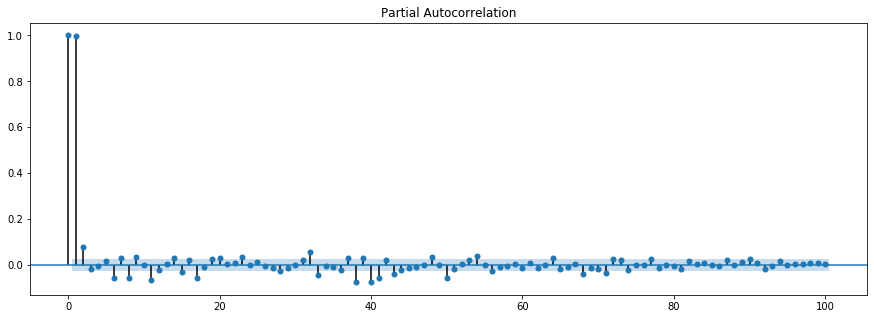

Función de autocorrelación y autocorrelación parcial para el índice GSPC.


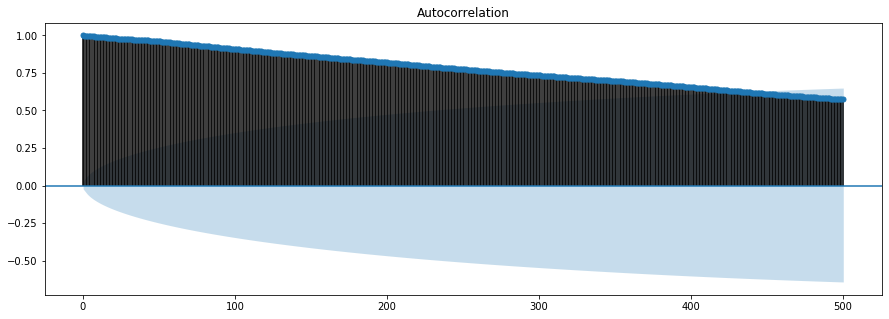

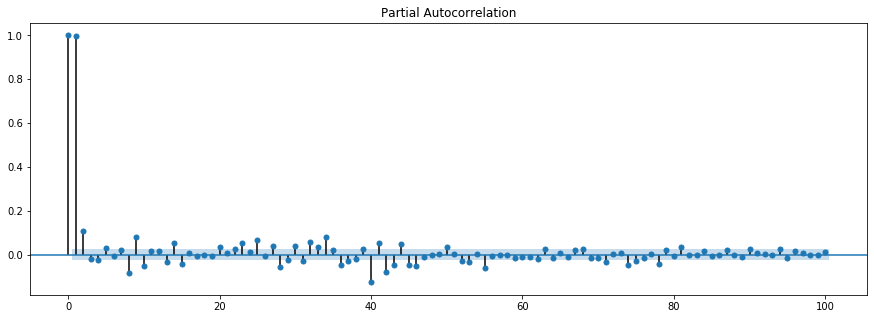

Función de autocorrelación y autocorrelación parcial para el índice NDX.


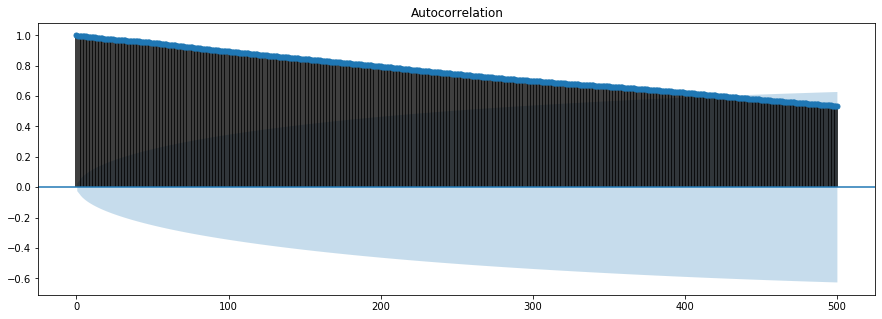

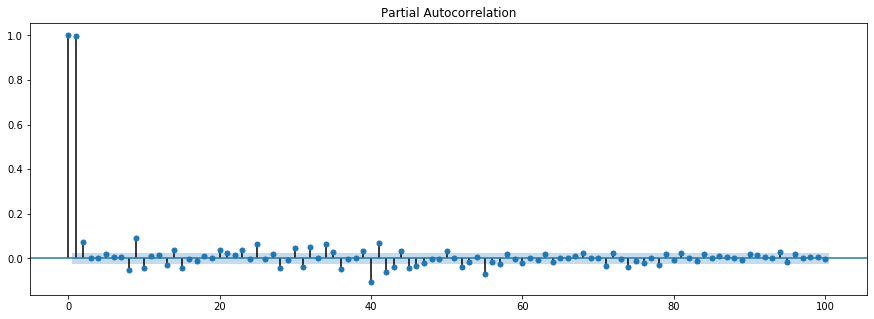

Función de autocorrelación y autocorrelación parcial para el índice FTSE.


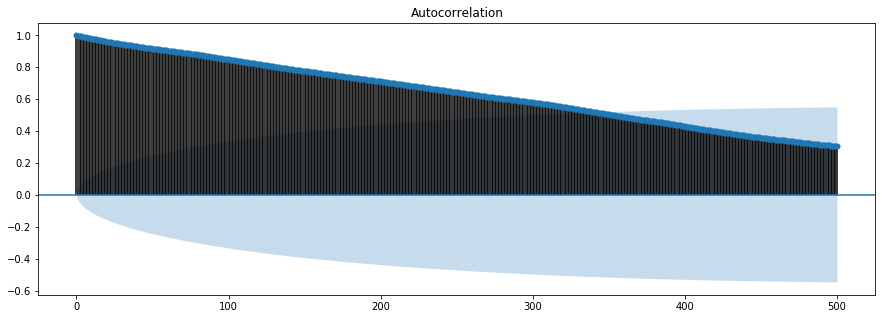

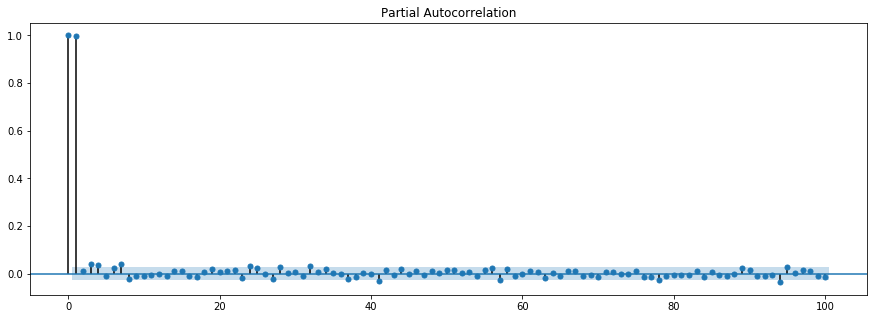

Función de autocorrelación y autocorrelación parcial para el índice GDAXI.


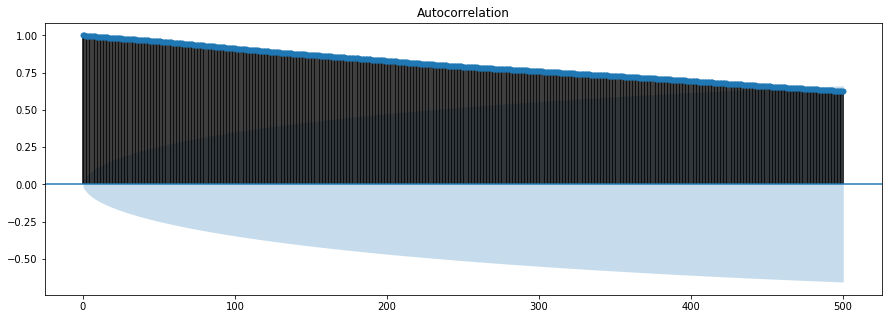

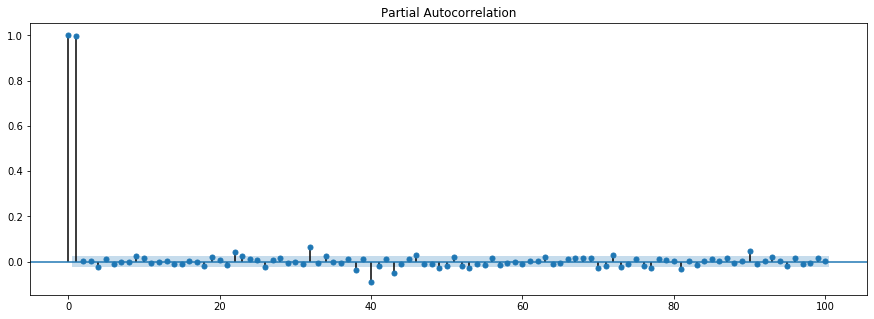

Función de autocorrelación y autocorrelación parcial para el índice FCHI.


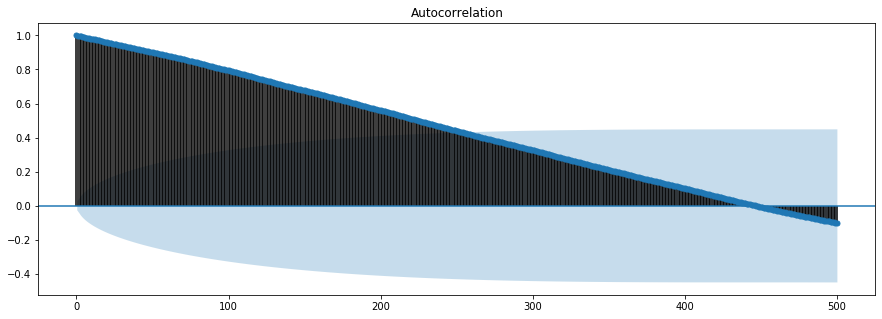

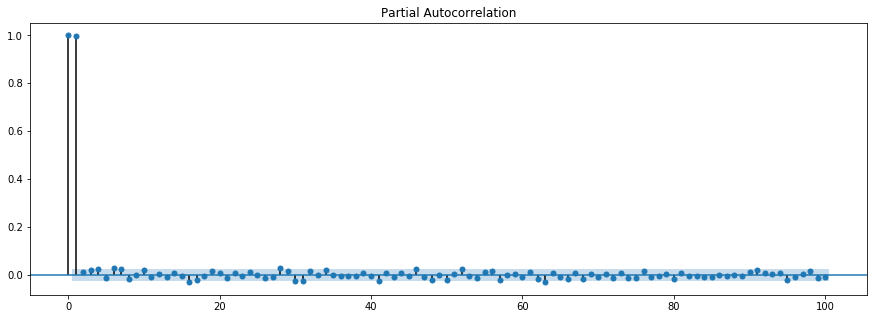

Función de autocorrelación y autocorrelación parcial para el índice N225.


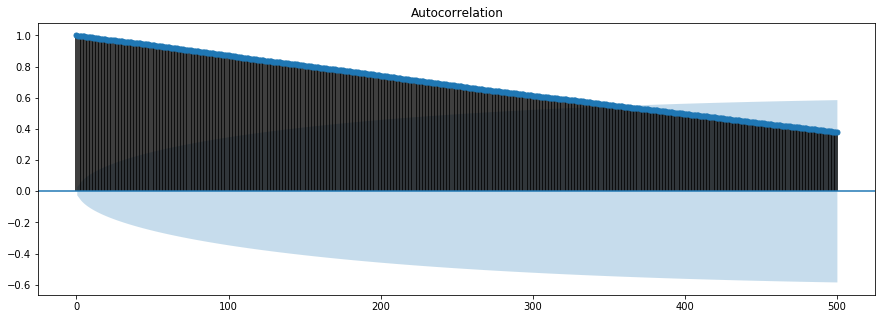

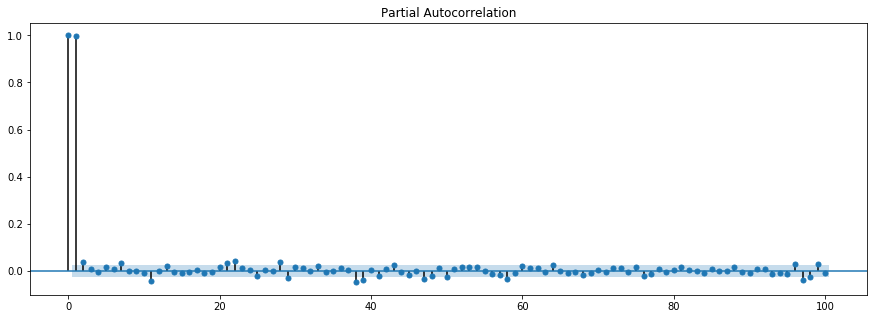

Función de autocorrelación y autocorrelación parcial para el índice HSI.


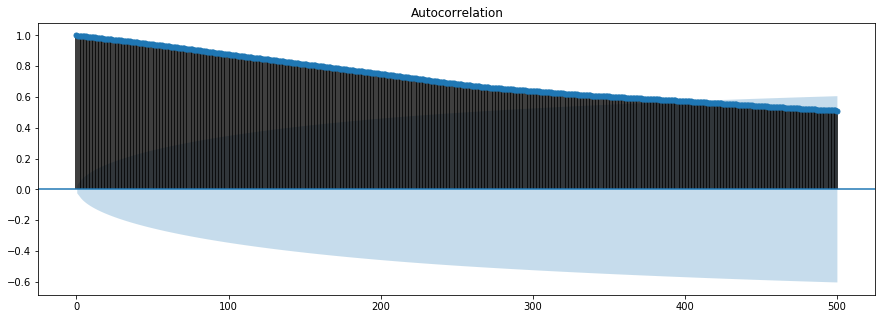

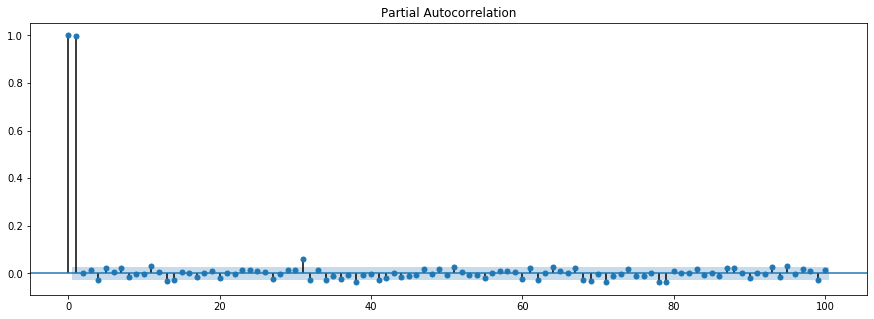

Función de autocorrelación y autocorrelación parcial para el índice SSEC.


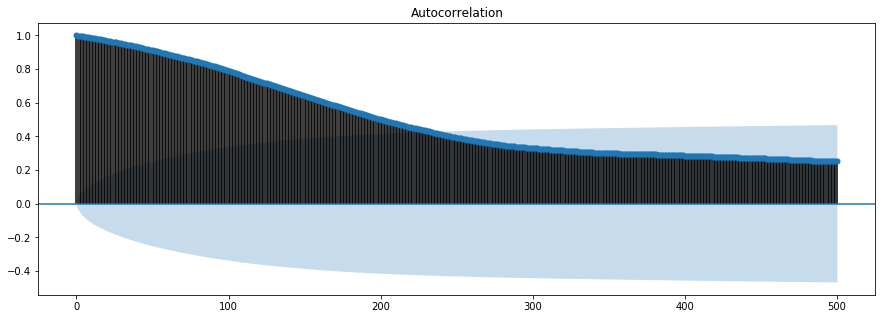

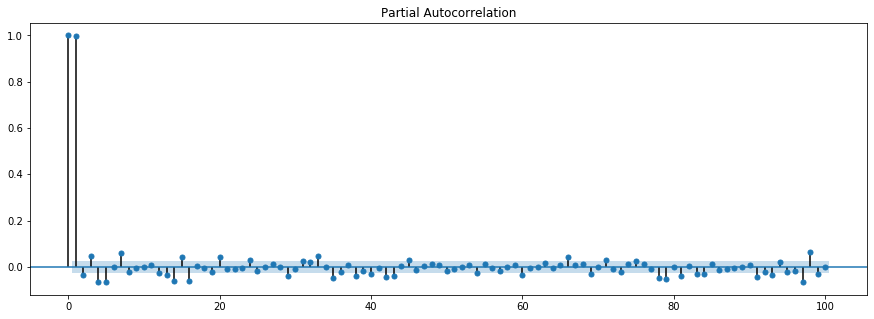

Función de autocorrelación y autocorrelación parcial para el índice BSESN.


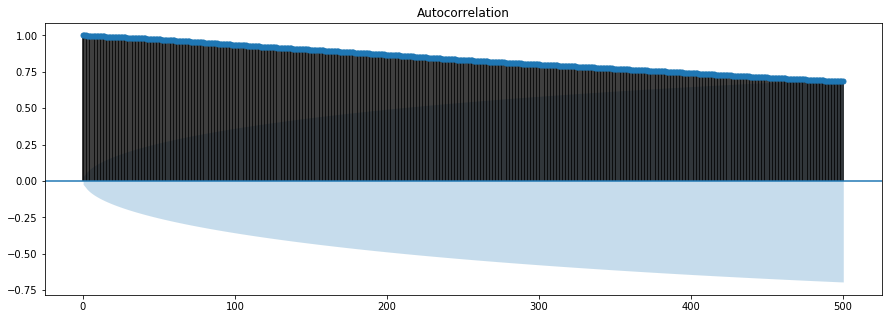

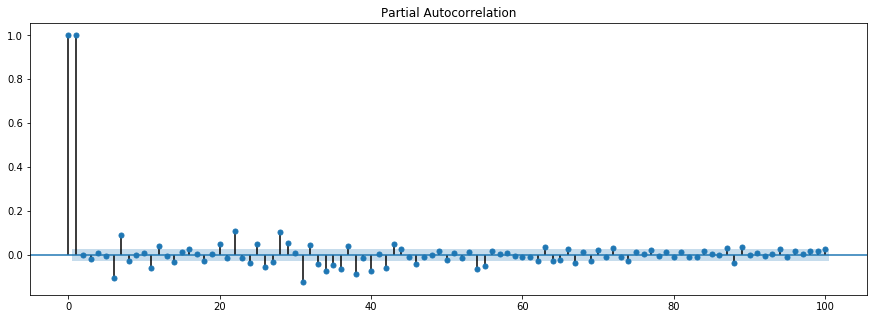

In [38]:
for indice in df.columns:
    print('Función de autocorrelación y autocorrelación parcial para el índice {}.'.format(indice))
    series = df[indice].dropna()
    plot_acf(series, lags = 500)
    plt.show()
    plot_pacf(series, lags=100)
    plt.show()

Como podemos ver de los correlogramas, en todos los casos se registra una fuerte correlación entre el valor de los índices y sus valores desplazados un lapso de tiempo $k$. Los intervalos de confidencia, representados por la zona celeste, indican que aquellos valores de correlación que se encuentran fuera de esta zona son probablemente una correlación y no simple suerte o casualidad. Podemos decir que en todos los casos, con un corrimiento de 200 observaciones, todos los índices tienen correlación, real, mayor a 0.5. Se puede observar que estas correlaciones, en algunos casos decaen suavemente, como por ejemplo para el índice MERV, en otros casos es más acentuada, como en el caso de SSEC y para el índice FCHI, esta correlación decae hasta volverse negativa luego de 450 observaciones aproximadamente. 

De los gráficos correspondientes a la función de autocorrelación parcial, podemos ver que hay una relación directa de los valores de los índices con aquellos separados por 1 retardo de tiempo, luego la relación parece ser despreciable. 


## Conclusiones

El conjunto de datos con el que hemos realizado el análisis, en esta instancia, consta de 11 índices (valores al cierre de cada día hábil) de diferentes paises, ellos son:

- MERV: Merval (Argentina)
- BVSPC: Bovespa (Brasil)
- GSPC: Standard & Poors 500 (Estados Unidos)
- NDX: Nasdaq 100 (Estados Unidos)
- FTSE: FTSE 100 (Reino Unido)
- GDAXI: DAX 30 (Alemania)
- FCHI: CAC 40 (Francia)
- N225: Nikkei 225 (Japón)
- HSI: Hang Seng (China)
- SSEC: Shanghai Composite (China)
- BSESN: Bombay Stock Exchange (India)

Hemos trabajado con el valor de los índices en crudo, es decir, no realizamos ninguna conversión como para que la comparación entre ellos sea más significativa. Sin embargo, hemos podido inferir sobre su comportamiento y evolución en el periodo de estudio (de julio de 1997 a mayo del corriente año)

Calculamos sus medidas de estadística descriptiva, como media, varianza y desviación standar. Además graficamos sus histogramas y boxplots, del primer gráfico vimos que las distribuciones de los valores están lejos de seguir una distribución normal. De los boxplots podemos ver que no hay gran cantidad de valores outliers y no hay estacionalidad a lo largo de los años. Es complejo el proceso de detección de outliers en series de tiempo, ya que como veremos las distribuciones de los índices son diferentes año a año, por lo que no podemos utilizar el método tradicional para detectar los valores atípicos. Como mostramos, utilizamos dos métodos para su posible detección.

Con respecto a la existencia de estacionalidad, de los gráficos de media y desviación estandar podemos decir, que estos valores no son constantes en el tiempo, por lo tanto no podemos hablar de series estacionales. Aunque en el caso de algunos índices y momentos cortos, como en el caso de Merval al comienzo del periodo de estudio, se podría divisar cierta estacionalidad. La conclusión de falta de estacionalidad se ve reforzada al ver los gráficos de las funciones de autocorrelación y autocorrelación parcial. De los cuales ya hemos hecho mención.  
